<center>

<img src="https://http2.mlstatic.com/storage/cx-support-fcm-api/fcm-pub-os-prod/cx-support-mario-frontend/cvasquezcord/mercadolibre-og.png" alt="Logo" width="50%"/>

# Data Science Challenge - Data & Analytics

</center>

---

---

## Caso de negocio seleccionado

<p style="font-size: 16px;">El equipo comercial quiere realizar estrategias focalizadas para los sellers, pero en este momento no existe una clasificación que permita identificar a aquellos que tienen un buen perfil y son relevantes para el negocio.   <strong>¿Cómo podrías ayudar al equipo comercial a identificar estos sellers?</strong>

---

---

## Entendimiento del problema

<p style="font-size: 16px;"><strong>Historia de mercado libre:</strong> -La plataforma de Mercado Libre es una de las primeras que comenzó a operar como negocio de comercio electrónico. Su fundación tuvo lugar en el año 1999 y en solo un año se extendió a otros países: Ecuador, Chile, Colombia y Venezuela. Su creciente éxito comenzó a atraer a nuevos inversores como fue el caso de Ebay que ahora participa de manera activa en la plataforma y es una de las inspiraciones de su creación.
    
<p style="font-size: 16px;"><strong>Modelo de negocio:</strong>El modelo de negocio de Mercado Libre es un modelo de comercio electrónico que opera al 100% a través de internet bajo un sistema de compraventa entre particulares (C2C, Customer to Customer). Hoy en día con su crecimiento y la integración de su línea de pagos y línea logísitica funciona más como un B2C.
    
<p style="font-size: 16px;">Así, este modelo ecommerce está configurado para que compradores y vendedores se puedan poner en contacto y lleven a cabo la transacción de los artículos donde mercado libre tiene ganancias por publicación, venta, uso de su plataforma de pagos y uso de su plataforma logistica.
    
<p style="font-size: 16px;"><strong>Estos ultimos puntos son fundamentales para entender el problema ya que los sellers relevantes para el negocio van a ser quienes contribuyan de manera directa a las ganancias de Mercado Libre mediante el pago de comisiones por venta, el pago por tipo de publicación, el pago de uso de la plataforma de pagos o el pago por envíos.</strong>
    
---  
    

---

## Plantemiento y resolución de preguntas

<p style="font-size: 16px;"><strong>¿qué información hay disponible?</strong>
    
- <p style="font-size: 16px;"> De acuerdo a una revisión de las APIs suministradas si bien tenemos información de los articulos vendidos de mercado libre, no tengo la información total, para el parametro offset la información pública llega hasta 1000 lo que no nos permite visualizar un universo completo de ventas y tampoco de los vendedores contenidos en estas.
    
<p style="font-size: 16px;"><strong>¿Es posible determinar el uso de mercado pago?</strong>

- <p style="font-size: 16px;"> En la información de la API de items se puede revisar si para el producto se tiene disponible el uso de mercado pero no tenemos acceso a un API de transacciones puras que nos permita determinar uno a uno el uso de mercado pago y agruparlo por vendedor para determinar la relevancia de un grupo de vendedores en específico.
    
<p style="font-size: 16px;"><strong>¿Es posible determinar el pago por publicidad o asociado?</strong> 

- <p style="font-size: 16px;"> En la revisión del API de sellers se encontro que para el publico por seller solo se tienen los primeros 50 resultados eso quiere decir que no es correctamente evaluable generar una metrica sobre numero de publicaciones y asociarlo a otras variables ya que por restricción de la información pública solo se tienen las primeras 50 publicaciones.
        
<p style="font-size: 16px;"><strong>¿Hay información asociada a envíos en cuanto a número de envíos?</strong>
    
- <p style="font-size: 16px;"> Sí, hay algunas metricas relacionadas con envío pero no se encontraron referencias suficientes por lo cual el caso no sera abordado por este tipo de variable.
    
<p style="font-size: 16px;"><strong>¿Hay información asociada ventas e inventario?</strong>

- <p style="font-size: 16px;"> Sí, hay información que relaciona los precios de los productos ofrecidos por el vendedor, cantidad vendida, inventario y en cola, esto sera fundamental para aportar al caso de negocio ya que no permite una forma simple y clara de determinar vendedores potenciales.
    
<p style="font-size: 16px;"><strong>¿Existe alguna variable que permita priorizar vendedores?</strong>

- <p style="font-size: 16px;"> Sí, hay variables como el level ID que permiten clasificar los vendedores, esta nos permitira comprobar si llegamos a una conclusión como si esta variable es suficiente para priorizar los vendedores o si hay otras maneras de segmentarlos para tener grupos más claros y acciones enfocadas.    

    ---

---

# Exploración de la información

<p style="font-size: 16px;"> Se arranca con lo entregado en la documentación del caso de negocio y se va profundizando de acuerdo al enfoque el cual es sellers

In [1]:
# Importación de librería para consulta del api
import requests

# Función para consulta y metodo para traer el json de categorias
requests.get('https://api.mercadolibre.com/sites/MCO/categories').json()

[{'id': 'MCO1747', 'name': 'Accesorios para Vehículos'},
 {'id': 'MCO441917', 'name': 'Agro'},
 {'id': 'MCO1403', 'name': 'Alimentos y Bebidas'},
 {'id': 'MCO1071', 'name': 'Animales y Mascotas'},
 {'id': 'MCO1367', 'name': 'Antigüedades y Colecciones'},
 {'id': 'MCO1368', 'name': 'Arte, Papelería y Mercería'},
 {'id': 'MCO1384', 'name': 'Bebés'},
 {'id': 'MCO1246', 'name': 'Belleza y Cuidado Personal'},
 {'id': 'MCO40433', 'name': 'Boletas para Espectáculos'},
 {'id': 'MCO1039', 'name': 'Cámaras y Accesorios'},
 {'id': 'MCO1743', 'name': 'Carros, Motos y Otros'},
 {'id': 'MCO1051', 'name': 'Celulares y Teléfonos'},
 {'id': 'MCO1648', 'name': 'Computación'},
 {'id': 'MCO1144', 'name': 'Consolas y Videojuegos'},
 {'id': 'MCO172890', 'name': 'Construcción'},
 {'id': 'MCO1276', 'name': 'Deportes y Fitness'},
 {'id': 'MCO5726', 'name': 'Electrodomésticos'},
 {'id': 'MCO1000', 'name': 'Electrónica, Audio y Video'},
 {'id': 'MCO175794', 'name': 'Herramientas'},
 {'id': 'MCO1574', 'name': 'Ho

<p style="font-size: 16px;">  Se revisan las categorías para Colombia las cuales tienen un id que comienza por MCO, así mismo se debe modificar la url para obtenerlas correctamente

In [2]:
# Descripción específica de categoría
requests.get('https://api.mercadolibre.com/categories/MCO1648').json()

{'id': 'MCO1648',
 'name': 'Computación',
 'picture': 'https://http2.mlstatic.com/storage/categories-api/images/f96f9ecc-dfe6-4cf9-a270-4c0cee23f868.png',
 'permalink': 'https://www.mercadolibre.com.co/c/computacion',
 'total_items_in_this_category': 1136399,
 'path_from_root': [{'id': 'MCO1648', 'name': 'Computación'}],
 'children_categories': [{'id': 'MCO416199',
   'name': 'Accesorios de Antiestática',
   'total_items_in_this_category': 3885},
  {'id': 'MCO447778',
   'name': 'Accesorios para PC Gaming',
   'total_items_in_this_category': 53427},
  {'id': 'MCO430598',
   'name': 'Almacenamiento',
   'total_items_in_this_category': 55728},
  {'id': 'MCO430918',
   'name': 'Cables y Hubs USB',
   'total_items_in_this_category': 71983},
  {'id': 'MCO441358',
   'name': 'Componentes de PC',
   'total_items_in_this_category': 63993},
  {'id': 'MCO1700',
   'name': 'Conectividad y Redes',
   'total_items_in_this_category': 99634},
  {'id': 'MCO441535',
   'name': 'Estabilizadores y UPS',


<p style="font-size: 16px;"> Posterior a esto se revisa el detalle de la categoría MCO16418 donde podemos ver una imagen asociada, el número total de items registrados en la categoria y las categorías hijas o subcategorías existentes

In [3]:
# Función para consulta y metodo para traer el json de los items
cat_id = 'MCO1051'
offset = 50
url = f'https://api.mercadolibre.com/sites/MCO/search?category={cat_id}&offset={offset}'
request = requests.get(url)
items = request.json()
items

{'site_id': 'MCO',
 'country_default_time_zone': 'GMT-05:00',
 'paging': {'total': 791433,
  'primary_results': 1000,
  'offset': 50,
  'limit': 50},
 'results': [{'id': 'MCO2006476814',
   'title': 'Xiaomi 13t Dual Sim 256 Gb Negro 12 Gb Ram',
   'condition': 'new',
   'thumbnail_id': '818465-MLA72723166303_112023',
   'catalog_product_id': 'MCO27801531',
   'listing_type_id': 'gold_special',
   'permalink': 'https://www.mercadolibre.com.co/xiaomi-13t-dual-sim-256-gb-negro-12-gb-ram/p/MCO27801531',
   'buying_mode': 'buy_it_now',
   'site_id': 'MCO',
   'category_id': 'MCO1055',
   'domain_id': 'MCO-CELLPHONES',
   'thumbnail': 'http://http2.mlstatic.com/D_818465-MLA72723166303_112023-I.jpg',
   'currency_id': 'COP',
   'order_backend': 1,
   'price': 1929900,
   'original_price': None,
   'sale_price': None,
   'sold_quantity': 1,
   'available_quantity': 1,
   'official_store_id': None,
   'use_thumbnail_id': True,
   'accepts_mercadopago': True,
   'tags': ['good_quality_thumbnail'

<p style="font-size: 16px;">  Para el código superior podemos observar el detalle de los items donde por cada item aparece el vendedor asociado y caracteristicas específicas del item

In [4]:
# Función para consulta y metodo para traer el json de los sellers
requests.get('https://api.mercadolibre.com/sites/MCO/search?seller_id=57067053').json()

{'site_id': 'MCO',
 'seller': {'id': 57067053,
  'nickname': 'DISTRIBUIDORA AGROPETS-CENTER',
  'car_dealer': False,
  'real_estate_agency': False,
  '_': False,
  'registration_date': '2008-10-14T22:21:36.000-04:00',
  'tags': ['normal', 'mshops', 'messages_as_seller'],
  'permalink': 'http://perfil.mercadolibre.com.co/DISTRIBUIDORA+AGROPETS-CENTER',
  'seller_reputation': {'level_id': '5_green',
   'power_seller_status': 'platinum',
   'transactions': {'canceled': 180,
    'completed': 15393,
    'period': 'historic',
    'ratings': {'negative': 0.02, 'neutral': 0.03, 'positive': 0.95},
    'total': 15573},
   'metrics': {'sales': {'period': '60 days', 'completed': 2984},
    'claims': {'period': '60 days', 'rate': 0.0016, 'value': 5},
    'delayed_handling_time': {'period': '60 days',
     'rate': 0.0033,
     'value': 10},
    'cancellations': {'period': '60 days', 'rate': 0.0003, 'value': 1}}}},
 'country_default_time_zone': 'GMT-05:00',
 'paging': {'total': 103, 'primary_results'

<p style="font-size: 16px;">  Por ultimo podemos ver los sellers donde se encuentra su id y los primeros 50 resultados de productos disponibles con su detalle, de aquí sera posible extraer caracteristicas de vendedor y construir variables relacionadas con las ventas 

---

---

# Extracción  de información

<p style="font-size: 16px;"> La extracción de la información se hara de la siguiente manera:
    
<p style="font-size: 16px;">1. Selección de un id de categoría para acotar a un número de sellers específico para optimizar los tiempos de corrida
    
    
<p style="font-size: 16px;">2. Recopilar todos los IDs seller únicos contenidos en esa categoría haciendo el recorrido de todo el offset disponible 
    
    
<p style="font-size: 16px;">3. Con los IDs seller recopilados recorrer la API de seller para extraer información de metricas existentes, elaborar metricas nuevas relacionadas con ventas y extraer información relacionada con identificación de seller que sera util al relacionarse para la entrega del resultado a los comerciales

In [5]:
# Extracción de ID seller para una categoría en específico dentro del json de atributos


offset_range = range(0, 1001, 50)  # Rango de 0 a 1000 con incrementos de 50
unique_seller_ids = set() # Variable tipo set para garantizar ids únicos

for offset in offset_range:
    cat_id = 'MCO1051'  # IDs de categoría el cual puede ser modificado por otra
    
    url = f'https://api.mercadolibre.com/sites/MCO/search?category={cat_id}&offset={offset}'
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa (código de estado 200)
    if response.status_code == 200:
        # Obtener el JSON de la respuesta
        items = response.json()

        # Extraer los IDs de vendedor y agregarlos al conjunto
        seller_ids = [item["seller"]["id"] for item in items["results"]]
        unique_seller_ids.update(seller_ids)
    else:
        print(f"Error en la solicitud para offset {offset}. Código de estado: {response.status_code}")

# Convertir el conjunto de IDs de vendedor únicos a una lista
unique_seller_ids_list = list(unique_seller_ids)

# Imprimir la lista de IDs de vendedor únicos
print("Todos los IDs de vendedor únicos:", unique_seller_ids_list)

# Imprimir el número total de vendedores
print("Número total de vendedores únicos:", len(unique_seller_ids_list))

Todos los IDs de vendedor únicos: [375762950, 23463946, 645566480, 1095473169, 606851103, 1200162852, 26671142, 155418681, 470474833, 460122197, 353486933, 48466011, 312653921, 38729826, 167506021, 264865901, 1105352817, 537432192, 41785484, 339353746, 1473235091, 55748756, 1293506710, 465256612, 52297899, 316229806, 241344690, 230895796, 1191252150, 310122679, 228960446, 567171270, 784343241, 515467467, 282267852, 55439565, 433193167, 86800592, 489857233, 145328341, 84818143, 461117670, 207591665, 179179763, 394887418, 1394311431, 650154251, 117917967, 443345170, 593119508, 201089319, 221747504, 774646071, 1074792760, 231655738, 1135466811, 30589246, 825475401, 1333154139, 466649439, 1456712042, 1071946105, 426283404, 13017487, 194466201, 1048891806, 143466911, 300415390, 542601651, 1015134655, 289102277, 245746121, 312957388, 86434261, 118755799, 138449369, 651303392, 6818277, 1143900646, 531538415, 287078901, 171379192, 1476145668, 442020360, 262388233, 738767370, 204386827, 1626813

In [6]:
# Extración de información de ID seller con variables creadas relacionadas con negocio

'''
Variables creadas:

cash inventario -> sumatoria(total de inventario x precio venta)
cash inback -> sumatoria(ordenes en espera x precio venta)
venta total -> sumatoria(articulos vendidos x precio venta)
max tags -> Número máximo de tags dentro de un producto del vendedor 

'''

# Importación de libreria pandas para creación y procesamiento con dataframes
import pandas as pd

# Función para extracción información y creación de variables 
def obtener_variables_vendedor(seller_id):
    # URL para obtener la información del vendedor
    url = f'https://api.mercadolibre.com/sites/MCO/search?seller_id={seller_id}'
    response = requests.get(url)

    # Inicializar las variables
    cash_inventario = 0
    venta_total = 0
    max_tags = 0

    # Verificar si la solicitud fue exitosa (código de estado 200)
    if response.status_code == 200:
        # Obtener el JSON de la respuesta
        seller_info = response.json()

        # Recorrer los resultados y calcular las variables
        for result in seller_info['results']:
            price = result['price']
            sold_quantity = result['sold_quantity']
            available_quantity = result['available_quantity']
            tags = result.get('tags', [])

            # Calcular las variables y sumarlas a las variables respectivas
            cash_inventario += price * available_quantity
            venta_total += price * sold_quantity
            max_tags = max(max_tags, len(tags))

        # Devolver las variables como un diccionario
        return {
            'seller_id': seller_id,
            'cash_inventario': cash_inventario,
            'venta_total': venta_total,
            'max_tags': max_tags
        }
    else:
        print(f"Error en la solicitud para el seller_id {seller_id}. Código de estado: {response.status_code}")
        return None

# Lista de seller_ids que quieres consultar
seller_ids = unique_seller_ids_list

# Lista para almacenar los resultados
resultados = []

# Obtener los resultados para cada seller_id
for seller_id in seller_ids:
    variables_vendedor = obtener_variables_vendedor(seller_id)
    if variables_vendedor:
        resultados.append(variables_vendedor)

# Crear un DataFrame de pandas
df = pd.DataFrame(resultados)

# Imprimir la tabla
df

,seller_id,cash_inventario,venta_total,max_tags
0,375762950,36032643,12254176,6
1,23463946,7791785,310523483,8
2,645566480,8195935,20523325,6
3,1095473169,69933662,6066391,5
4,606851103,74156004,315391766,6
...,...,...,...,...
329,135462891,59700932,1073840885,7
330,1075372014,35138760,39598539,6
331,344150006,57894626,139967686,7
332,713615355,2376735,18759370,5


In [7]:
# Extración de información de ID seller de variables existentes relevantes para el caso de negocio

# Función extracción de variables existentes
def obtener_variables_vendedor(seller_id):
    # URL para obtener la información del vendedor
    url = f'https://api.mercadolibre.com/sites/MCO/search?seller_id={seller_id}'
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa (código de estado 200)
    if response.status_code == 200:
        # Obtener el JSON de la respuesta
        seller_info = response.json()

        # Extraer información del vendedor
        seller_data = seller_info.get("seller", {})
        
        seller_id = seller_data.get("id")
        seller_reputation = seller_data.get("seller_reputation", {})
        
        level_id = seller_reputation.get("level_id")
        power_seller_status = seller_reputation.get("power_seller_status")
        
        transactions = seller_reputation.get("transactions", {})
        canceled_transactions = transactions.get("canceled")
        completed_transactions = transactions.get("completed")
        
        ratings = transactions.get("ratings", {})
        negative_ratings = ratings.get("negative")
        positive_ratings = ratings.get("positive")
        neutral_ratings = ratings.get("neutral")
        
        total_transactions = transactions.get("total")

        metrics = seller_reputation.get("metrics", {})
        sales_completed = metrics.get("sales", {}).get("completed")
        claims_rate = metrics.get("claims", {}).get("rate")
        claims_value = metrics.get("claims", {}).get("value")
        cancellations_rate = metrics.get("cancellations", {}).get("rate")
        cancellations_value = metrics.get("cancellations", {}).get("value")

        paging_total = seller_info.get("paging", {}).get("total")
        paging_primary_results = seller_info.get("paging", {}).get("primary_results")

        # Crear un diccionario con las variables
        variables_vendedor = {
            "seller_id": seller_id,
            "Level ID": level_id,
            "Power Seller Status": power_seller_status,
            "Canceled Transactions": canceled_transactions,
            "Completed Transactions": completed_transactions,
            "Negative Ratings": negative_ratings,
            "Positive Ratings": positive_ratings,
            "Neutral Ratings": neutral_ratings,
            "Total Transactions": total_transactions,
            "Sales Completed": sales_completed,
            "Claims Rate": claims_rate,
            "Claims Value": claims_value,
            "Cancellations Rate": cancellations_rate,
            "Cancellations Value": cancellations_value,
            "Paging Total": paging_total,
            "Paging Primary Results": paging_primary_results
        }

        return variables_vendedor

    else:
        print(f"Error en la solicitud para Seller ID {seller_id}. Código de estado: {response.status_code}")
        return None

# Lista de seller_ids
seller_ids = unique_seller_ids_list  # Se agrega lista extraida anteriormente

# Lista para almacenar los resultados
resultados = []

# Obtener los resultados para cada seller_id
for seller_id in seller_ids:
    variables_vendedor = obtener_variables_vendedor(seller_id)
    if variables_vendedor:
        resultados.append(variables_vendedor)

# Comprobar extracción
if resultados:
    print("Resultados exitosos. ")
else:
    print("No se obtuvieron resultados.")
    

# Convertir la lista de resultados en un DataFrame
df1 = pd.DataFrame(resultados)
df1

Resultados exitosos. 


,seller_id,Level ID,Power Seller Status,Canceled Transactions,Completed Transactions,Negative Ratings,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results
0,375762950,5_green,None,90,876,0.03,0.94,0.03,966,127,0.0074,1,0.0000,0,422,40
1,23463946,5_green,gold,175,3936,0.10,0.89,0.01,4111,690,0.0083,6,0.0000,0,100,83
2,645566480,5_green,silver,183,2407,0.13,0.82,0.05,2590,220,0.0131,3,0.0043,1,255,18
3,1095473169,4_light_green,None,9,38,0.00,1.00,0.00,47,38,0.0000,0,0.0000,0,36,14
4,606851103,5_green,gold,142,2486,0.10,0.86,0.04,2628,434,0.0150,7,0.0086,4,84,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,135462891,5_green,platinum,215,4766,0.11,0.85,0.04,4981,1516,0.0069,11,0.0006,1,160,67
330,1075372014,5_green,None,17,155,0.55,0.45,0.00,172,155,0.0174,3,0.0116,2,31,31
331,344150006,5_green,silver,59,1361,0.08,0.90,0.02,1420,183,0.0103,2,0.0000,0,50,50
332,713615355,5_green,silver,42,736,0.16,0.67,0.17,778,256,0.0148,4,0.0000,0,192,19


In [8]:
# Extracción de variables relacionadas con identificacion

# Función para extración de ID seller y nickname 
def obtener_variables_identificacion(seller_id):
    # URL para obtener la información del vendedor
    url = f'https://api.mercadolibre.com/sites/MCO/search?seller_id={seller_id}'
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa (código de estado 200)
    if response.status_code == 200:
        # Obtener el JSON de la respuesta
        seller_info = response.json()

        # Extraer información del vendedor
        seller_data = seller_info.get("seller", {})
        seller_id = seller_data.get("id")
        nickname = seller_data.get("nickname")
  
      
        # Crear un diccionario con las variables
        variables_vendedor = {
            "seller_id": seller_id,
            "Nickname": nickname,   
        }

        return variables_vendedor

    else:
        print(f"Error en la solicitud para Seller ID {seller_id}. Código de estado: {response.status_code}")
        return None

# Lista de seller_ids
seller_ids = unique_seller_ids_list  # Agrega tus seller_ids aquí

# Lista para almacenar los resultados
resultados = []

# Obtener los resultados para cada seller_id
for seller_id in seller_ids:
    variables_vendedor = obtener_variables_identificacion(seller_id)
    if variables_vendedor:
        resultados.append(variables_vendedor)

# Comprobar extracción
if resultados:
    print("Resultados exitosos. ")
else:
    print("No se obtuvieron resultados.")
    

# Convertir la lista de resultados en un DataFrame
df2 = pd.DataFrame(resultados)
df2

Resultados exitosos. 


,seller_id,Nickname
0,375762950,MULTIBYNECOLOMBIA
1,23463946,GARAJEC
2,645566480,INNOVATIONIMPORTACIONES
3,1095473169,MOBILEPHONE122
4,606851103,WILTECHNO SASA
...,...,...
329,135462891,GAMEPLAYCOMCO
330,1075372014,KOROLOS_KSPORTS
331,344150006,SILVIAPEREZPINO
332,713615355,LIONTECH IMPORTACIONES


In [9]:
# Union de dataframes a usar en modelamiento

df_merged = pd.merge(df, df1, on='seller_id', how='left')
df_merged

,seller_id,cash_inventario,venta_total,max_tags,Level ID,Power Seller Status,Canceled Transactions,Completed Transactions,Negative Ratings,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results
0,375762950,36032643,12254176,6,5_green,None,90,876,0.03,0.94,0.03,966,127,0.0074,1,0.0000,0,422,40
1,23463946,7791785,310523483,8,5_green,gold,175,3936,0.10,0.89,0.01,4111,690,0.0083,6,0.0000,0,100,83
2,645566480,8195935,20523325,6,5_green,silver,183,2407,0.13,0.82,0.05,2590,220,0.0131,3,0.0043,1,255,18
3,1095473169,69933662,6066391,5,4_light_green,None,9,38,0.00,1.00,0.00,47,38,0.0000,0,0.0000,0,36,14
4,606851103,74156004,315391766,6,5_green,gold,142,2486,0.10,0.86,0.04,2628,434,0.0150,7,0.0086,4,84,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,135462891,59700932,1073840885,7,5_green,platinum,215,4766,0.11,0.85,0.04,4981,1516,0.0069,11,0.0006,1,160,67
330,1075372014,35138760,39598539,6,5_green,None,17,155,0.55,0.45,0.00,172,155,0.0174,3,0.0116,2,31,31
331,344150006,57894626,139967686,7,5_green,silver,59,1361,0.08,0.90,0.02,1420,183,0.0103,2,0.0000,0,50,50
332,713615355,2376735,18759370,5,5_green,silver,42,736,0.16,0.67,0.17,778,256,0.0148,4,0.0000,0,192,19


---

--- 

## Ajuste de variables 


In [10]:
# ajuste de variable level id 

# Mapear los valores de 'level_id' a valores numericos
mapping = {'5_green': 5, '2_orange': 2, '3_yellow': 3, '1_red': 1, '4_light_green': 4}
df_merged['Level ID'] = df_merged['Level ID'].map(mapping)

# Rellenar valores vacíos con 0
df_merged['Level ID'] = df_merged['Level ID'].fillna(0).astype(int)

In [11]:
df_merged['Level ID'].value_counts()

5    309
3     13
4     11
0      1
Name: Level ID, dtype: int64

<p style="font-size: 16px;">Para la variable Level ID se hace cambio de variable categorica ordinal a variable numerica y los no clasificados se llenan en 0 

## Evaluación inicial de distribución de nivel de seller

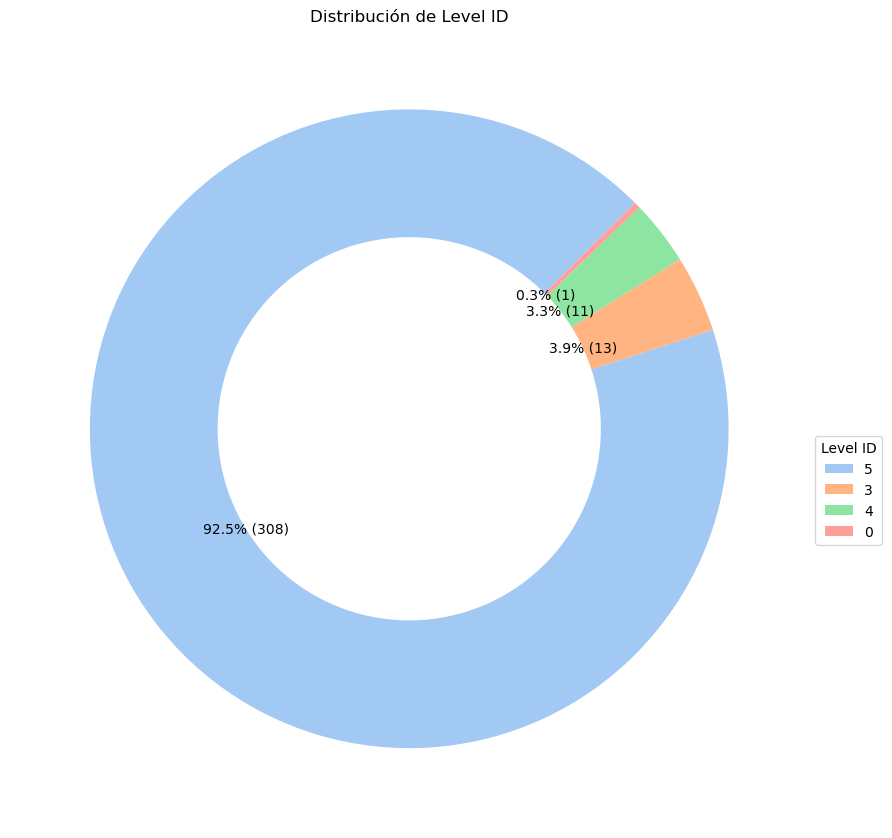

In [12]:
# importacion de librerias de visualización 
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un conteo de las categorías en 'level ID'
level_id_counts = df_merged['Level ID'].value_counts()

# Configurar el gráfico
plt.figure(figsize=(9, 9))
plt.title('Distribución de Level ID')

# Crear el gráfico de torta
sns.set_palette('pastel')  # Seleccionar una paleta de colores pastel
ax = level_id_counts.plot(kind='pie', autopct=lambda p: f'{p:.1f}% ({int(p*sum(level_id_counts)/100)})'
                          , startangle=45, wedgeprops=dict(width=0.4), labels=None)

# Agregar etiquetas y leyenda
plt.ylabel('')  # Eliminar etiqueta 'level ID' en el eje y
plt.legend(level_id_counts.index, loc='upper left', bbox_to_anchor=(1, 0.5), title='Level ID')

# Ajustar layout para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<p style="font-size: 16px;"> Inicialmente para los vendedores extraidos se tiene una distribución de el 93% en el nivel 5

In [13]:
# Llenado de variable status seller

df_merged['Power Seller Status'] = df_merged['Power Seller Status'].fillna('None status')
df_merged['Power Seller Status'].value_counts()

None status    133
platinum        83
silver          64
gold            54
Name: Power Seller Status, dtype: int64

In [14]:
# Indexación de variables de identificacion

df_merged.set_index('seller_id', inplace=True)
df_merged

,cash_inventario,venta_total,max_tags,Level ID,Power Seller Status,Canceled Transactions,Completed Transactions,Negative Ratings,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results
seller_id,,,,,,,,,,,,,,,,,,
375762950,36032643,12254176,6,5,None status,90,876,0.03,0.94,0.03,966,127,0.0074,1,0.0000,0,422,40
23463946,7791785,310523483,8,5,gold,175,3936,0.10,0.89,0.01,4111,690,0.0083,6,0.0000,0,100,83
645566480,8195935,20523325,6,5,silver,183,2407,0.13,0.82,0.05,2590,220,0.0131,3,0.0043,1,255,18
1095473169,69933662,6066391,5,4,None status,9,38,0.00,1.00,0.00,47,38,0.0000,0,0.0000,0,36,14
606851103,74156004,315391766,6,5,gold,142,2486,0.10,0.86,0.04,2628,434,0.0150,7,0.0086,4,84,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135462891,59700932,1073840885,7,5,platinum,215,4766,0.11,0.85,0.04,4981,1516,0.0069,11,0.0006,1,160,67
1075372014,35138760,39598539,6,5,None status,17,155,0.55,0.45,0.00,172,155,0.0174,3,0.0116,2,31,31
344150006,57894626,139967686,7,5,silver,59,1361,0.08,0.90,0.02,1420,183,0.0103,2,0.0000,0,50,50


## Acotado de la data de acuerdo a logica de negocio planteada

<p style="font-size: 16px;">Se descartan los seller sin ventas y los sellers con ventas debajo de la mediana, esto genera un enfoque en buscar segmentación para los sellers de mayor valor centrados en la comisión por ventas

In [15]:
# 1 Eliminación de sellers sin ventas (irrelevantes para caso de negocio por no generar ingresos a MELI)

df_merged = df_merged.loc[df_merged['venta_total'] != 0]
df_merged 

,cash_inventario,venta_total,max_tags,Level ID,Power Seller Status,Canceled Transactions,Completed Transactions,Negative Ratings,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results
seller_id,,,,,,,,,,,,,,,,,,
375762950,36032643,12254176,6,5,None status,90,876,0.03,0.94,0.03,966,127,0.0074,1,0.0000,0,422,40
23463946,7791785,310523483,8,5,gold,175,3936,0.10,0.89,0.01,4111,690,0.0083,6,0.0000,0,100,83
645566480,8195935,20523325,6,5,silver,183,2407,0.13,0.82,0.05,2590,220,0.0131,3,0.0043,1,255,18
1095473169,69933662,6066391,5,4,None status,9,38,0.00,1.00,0.00,47,38,0.0000,0,0.0000,0,36,14
606851103,74156004,315391766,6,5,gold,142,2486,0.10,0.86,0.04,2628,434,0.0150,7,0.0086,4,84,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135462891,59700932,1073840885,7,5,platinum,215,4766,0.11,0.85,0.04,4981,1516,0.0069,11,0.0006,1,160,67
1075372014,35138760,39598539,6,5,None status,17,155,0.55,0.45,0.00,172,155,0.0174,3,0.0116,2,31,31
344150006,57894626,139967686,7,5,silver,59,1361,0.08,0.90,0.02,1420,183,0.0103,2,0.0000,0,50,50


In [16]:
    # Eliminación de sellers por debajo de la mediana de ventas para acotar a seller encima de la mediana de ventas

mediana_ventas = df_merged['venta_total'].median()
df_merged = df_merged.loc[df_merged['venta_total'] >= mediana_ventas]
df_merged

,cash_inventario,venta_total,max_tags,Level ID,Power Seller Status,Canceled Transactions,Completed Transactions,Negative Ratings,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results
seller_id,,,,,,,,,,,,,,,,,,
23463946,7791785,310523483,8,5,gold,175,3936,0.10,0.89,0.01,4111,690,0.0083,6,0.0000,0,100,83
606851103,74156004,315391766,6,5,gold,142,2486,0.10,0.86,0.04,2628,434,0.0150,7,0.0086,4,84,50
470474833,2536921050,1352471538,6,5,None status,555,7523,0.22,0.74,0.04,8078,1235,0.0142,19,0.0187,25,635,635
460122197,55612152,64625327,6,5,platinum,197,2344,0.27,0.69,0.04,2541,668,0.0084,6,0.0084,6,34,34
353486933,97906791,144846030,6,3,None status,94,1303,0.10,0.86,0.04,1397,88,0.0520,5,0.0104,1,215,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153636791,38155000,58715700,5,5,None status,33,443,0.00,1.00,0.00,476,108,0.0088,1,0.0000,0,311,311
1207093176,1841681815,4398305935,6,5,platinum,1850,21210,0.36,0.61,0.03,23060,2388,0.0067,17,0.0003,1,287,287
168574945,15326027,105138502,5,5,silver,114,2078,0.05,0.90,0.05,2192,194,0.0050,1,0.0050,1,1101,33


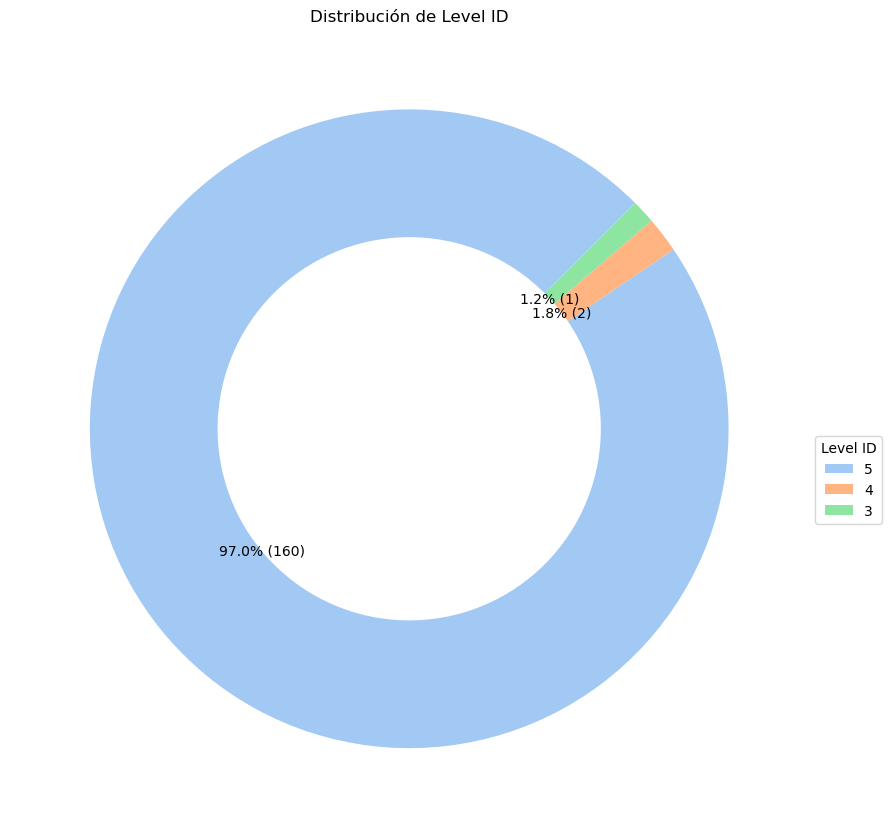

In [17]:
# Gráfico de Level ID con los ajustes de data de acuerdo a las hipotesis de negocio

# Crear un conteo de las categorías en 'level ID'
level_id_counts = df_merged['Level ID'].value_counts()

# Configurar el gráfico
plt.figure(figsize=(9, 9))
plt.title('Distribución de Level ID')

# Crear el gráfico de torta
sns.set_palette('pastel')  # Seleccionar una paleta de colores pastel
ax = level_id_counts.plot(kind='pie', autopct=lambda p: f'{p:.1f}% ({int(p*sum(level_id_counts)/100)})'
                          , startangle=45, wedgeprops=dict(width=0.4), labels=None)

# Agregar etiquetas y leyenda
plt.ylabel('')  # Eliminar etiqueta 'level ID' en el eje y
plt.legend(level_id_counts.index, loc='upper left', bbox_to_anchor=(1, 0.5), title='Level ID')

# Ajustar layout para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<p style="font-size: 16px;">Con el acotamiento de lógica de negocio se puede observar como la proporción de nivel 5 aumento a un 97%

---

## Análisis exploratorio



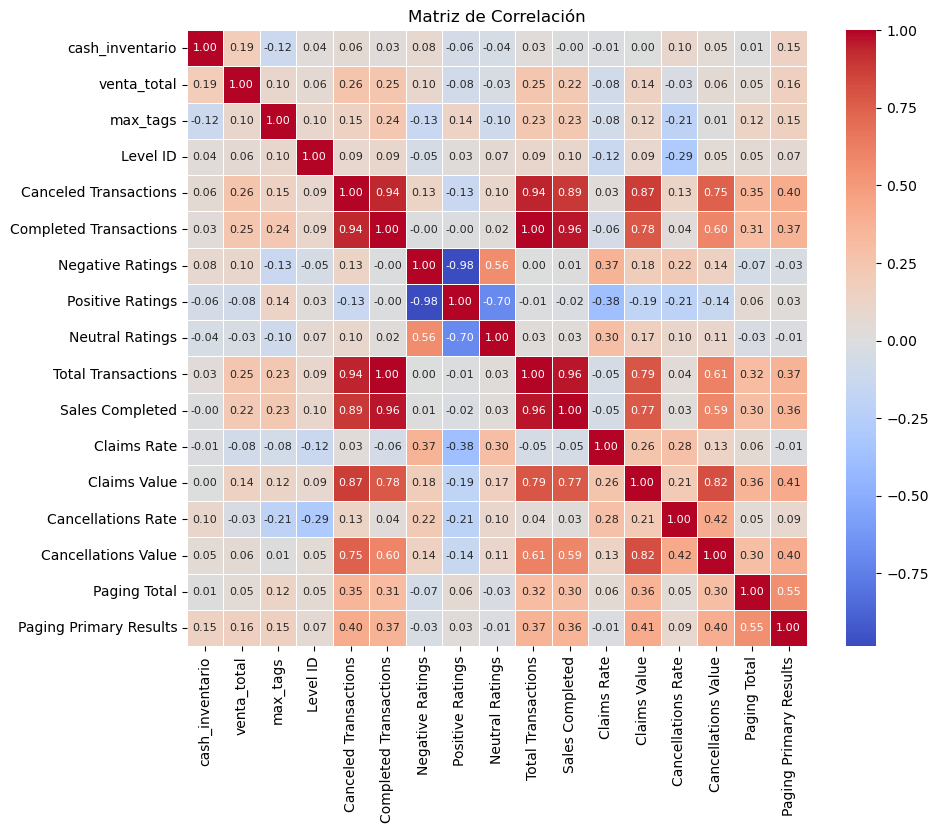

In [18]:
# Calculo de relaciones para acotar el número de variables (disminución de correlaciones)

# Calcular la matriz de correlación
correlation_matrix = df_merged.corr()

# Ajustar el tamaño de los números
annot_kws = {"size": 8}

# Visualizar la matriz de correlación gráficamente
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws=annot_kws)
plt.title("Matriz de Correlación")
plt.show()

<p style="font-size: 16px;"> Para las variables que tienen un coeficiente de correlación alto con otras variables se eliminan del ejercicio

In [19]:
# Variables a quitar por correlaciones altas

# Lista de variables que deseas eliminar
variables_a_eliminar = [
                        'Negative Ratings','Canceled Transactions',
                        'Completed Transactions']

# Eliminar las variables
df_sin_variables = df_merged.drop(variables_a_eliminar, axis=1)

In [20]:
df_sin_variables

,cash_inventario,venta_total,max_tags,Level ID,Power Seller Status,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results
seller_id,,,,,,,,,,,,,,,
23463946,7791785,310523483,8,5,gold,0.89,0.01,4111,690,0.0083,6,0.0000,0,100,83
606851103,74156004,315391766,6,5,gold,0.86,0.04,2628,434,0.0150,7,0.0086,4,84,50
470474833,2536921050,1352471538,6,5,None status,0.74,0.04,8078,1235,0.0142,19,0.0187,25,635,635
460122197,55612152,64625327,6,5,platinum,0.69,0.04,2541,668,0.0084,6,0.0084,6,34,34
353486933,97906791,144846030,6,3,None status,0.86,0.04,1397,88,0.0520,5,0.0104,1,215,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153636791,38155000,58715700,5,5,None status,1.00,0.00,476,108,0.0088,1,0.0000,0,311,311
1207093176,1841681815,4398305935,6,5,platinum,0.61,0.03,23060,2388,0.0067,17,0.0003,1,287,287
168574945,15326027,105138502,5,5,silver,0.90,0.05,2192,194,0.0050,1,0.0050,1,1101,33


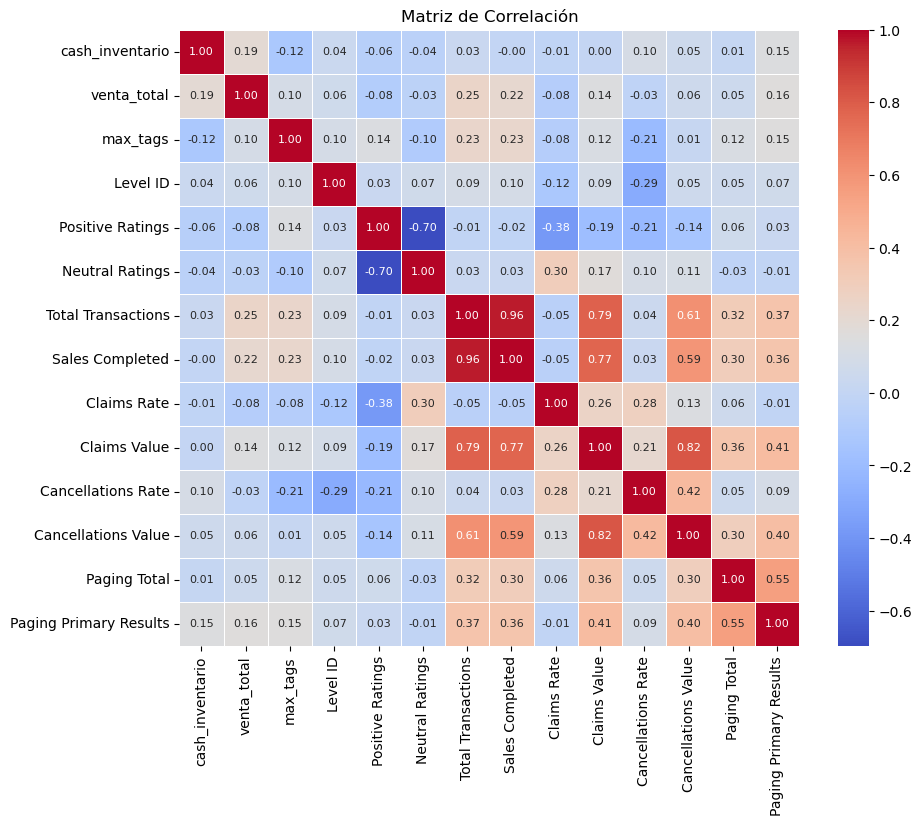

In [21]:
# Calcular la matriz de correlación
correlation_matrix = df_sin_variables.corr()

# Ajustar el tamaño de los números
annot_kws = {"size": 8}

# Visualizar la matriz de correlación gráficamente
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws=annot_kws)
plt.title("Matriz de Correlación")
plt.show()

<p style="font-size: 16px;">Aunque la variable de reclamos y cancelaciones tienen una correlación alta se dejan las 2 con fines de hacer revisión sobre los resultados esperados en la segmentación de clientes

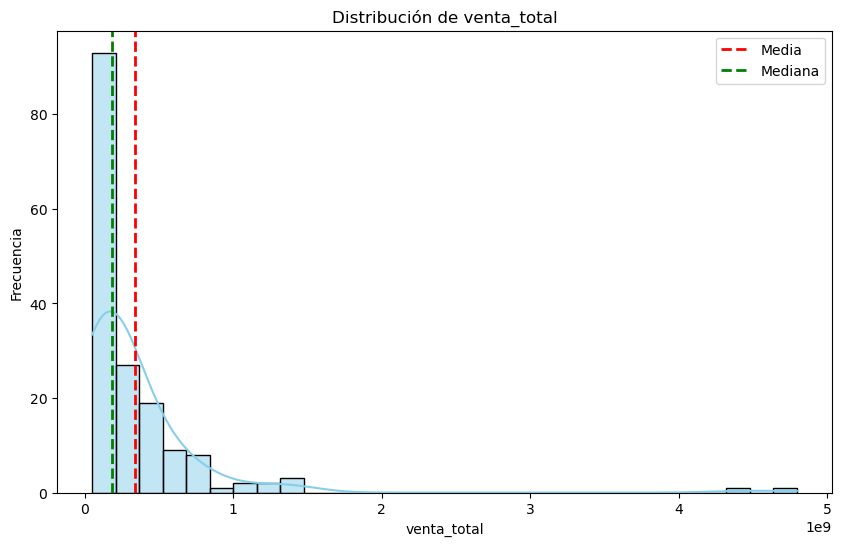

In [22]:
# Distribucion de venta total

plt.figure(figsize=(10, 6))
sns.histplot(df_merged['venta_total'], bins=30, kde=True, color='skyblue')

# Agregar líneas para la media y la mediana
mean_value = df_merged['venta_total'].mean()
median_value = df_merged['venta_total'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Mediana')

plt.title('Distribución de venta_total')
plt.xlabel('venta_total')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

<p style="font-size: 16px;">Podemos observar como las ventas se concentran entre los 50 y 200 millones pero el sesgo a la derecha es muy fuerte

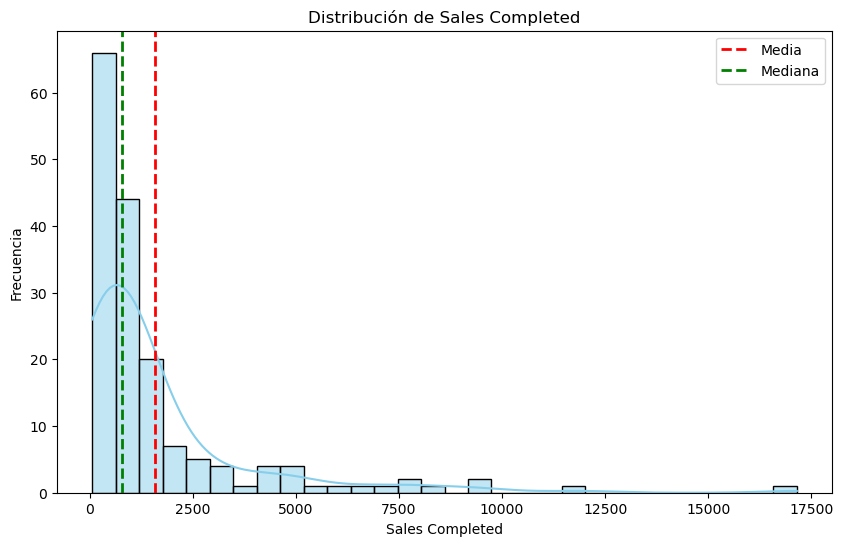

In [23]:
#Distribución de Sales Completed

# Gráfico de distribución 
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['Sales Completed'], bins=30, kde=True, color='skyblue')

# Agregar líneas para la media y la mediana
mean_value = df_merged['Sales Completed'].mean()
median_value = df_merged['Sales Completed'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Mediana')

plt.title('Distribución de Sales Completed')
plt.xlabel('Sales Completed')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

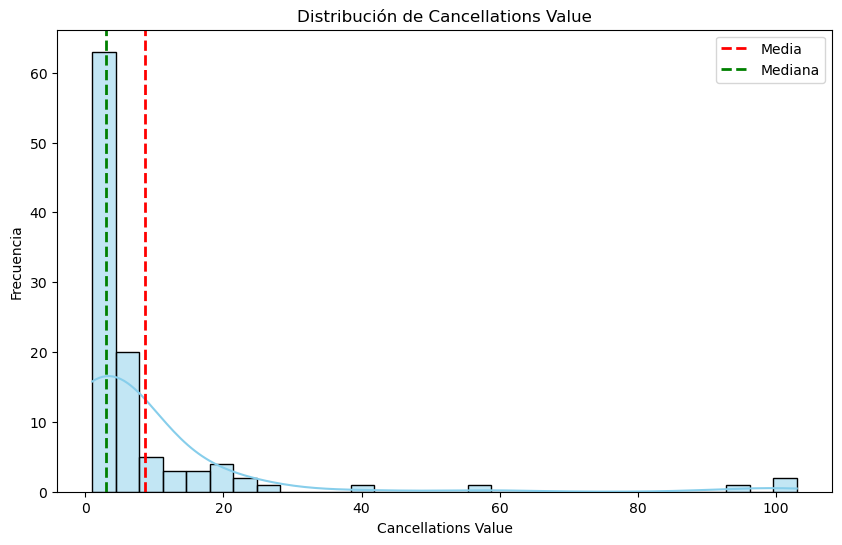

In [24]:
#Distribución de cancelaciones

# Gráfico de distribución 
plt.figure(figsize=(10, 6))
sns.histplot(df_merged[df_merged['Cancellations Value'] != 0]['Cancellations Value'], bins=30, kde=True, color='skyblue')

# Agregar líneas para la media y la mediana
mean_value = df_merged[df_merged['Cancellations Value'] != 0]['Cancellations Value'].mean()
median_value = df_merged[df_merged['Cancellations Value'] != 0]['Cancellations Value'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Mediana')

plt.title('Distribución de Cancellations Value')
plt.xlabel('Cancellations Value')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

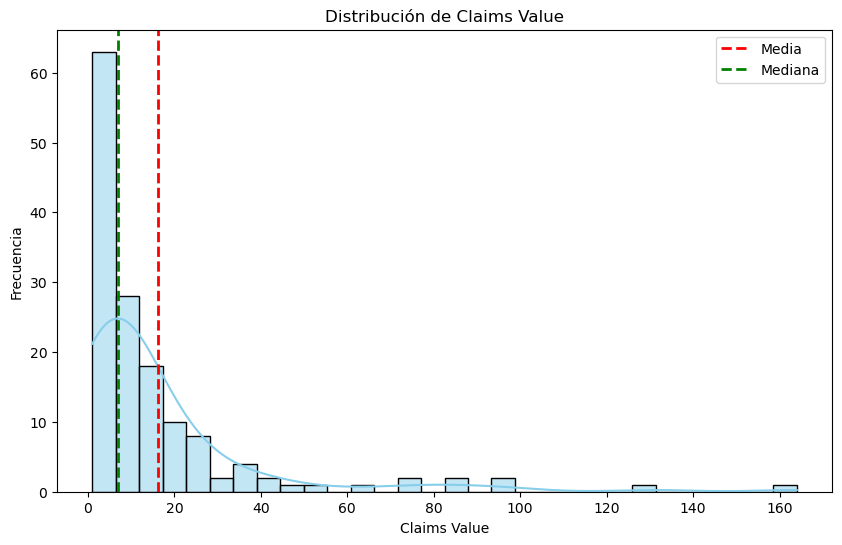

In [25]:
#Distribución de reclamos

# Gráfico de distribución (histograma) de 'Sales Completed'
plt.figure(figsize=(10, 6))
sns.histplot(df_merged[df_merged['Claims Value'] != 0]['Claims Value'], bins=30, kde=True, color='skyblue')

# Agregar líneas para la media y la mediana
mean_value = df_merged[df_merged['Claims Value'] != 0]['Claims Value'].mean()
median_value = df_merged[df_merged['Claims Value'] != 0]['Claims Value'].median()

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Mediana')

plt.title('Distribución de Claims Value')
plt.xlabel('Claims Value')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

<p style="font-size: 16px;"> En conclusión lo que vamos a tener de estas gráficas es un comportamiento sesgado que dificulta la identificación de grupos generales 

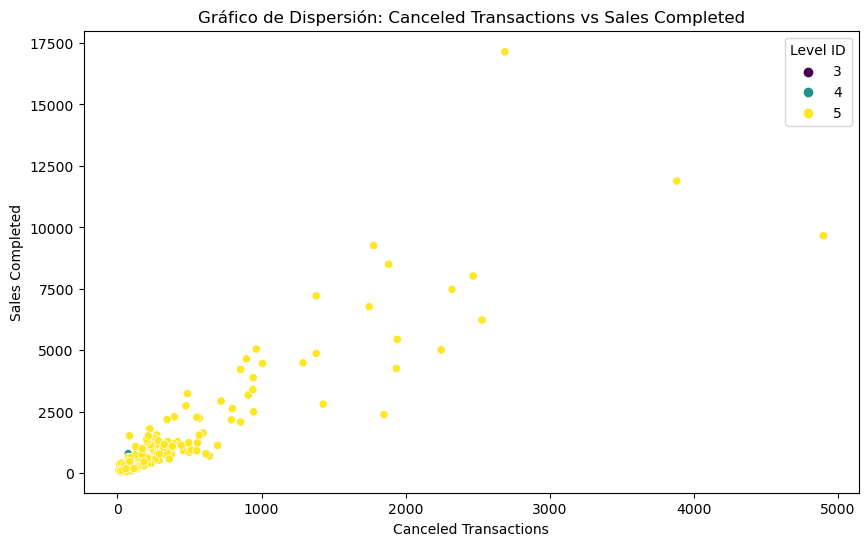

In [26]:
# grafico de dispersion


# Creación del gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot( x="Canceled Transactions", y="Sales Completed", hue="Level ID", data=df_merged, palette="viridis")
plt.title('Gráfico de Dispersión: Canceled Transactions vs Sales Completed')
plt.xlabel('Canceled Transactions')
plt.ylabel('Sales Completed')
plt.show()


<p style="font-size: 16px;">Haciendo una relación entre ventas completadas y canceladas podemos observar un pequeño grupo que se desvía hacia abajo, lo que quiere decir que tiene una relación más alta de cancelaciones, este no se puede distinguir con la variable level id

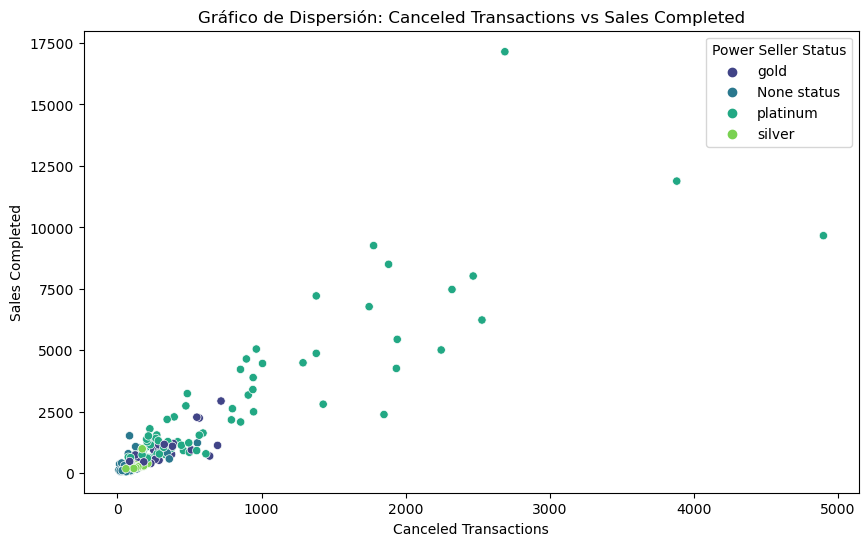

In [27]:
# grafico de dispersion


# Creación del gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot( x="Canceled Transactions", y="Sales Completed", hue="Power Seller Status", data=df_merged, palette="viridis")
plt.title('Gráfico de Dispersión: Canceled Transactions vs Sales Completed')
plt.xlabel('Canceled Transactions')
plt.ylabel('Sales Completed')
plt.show()


<p style="font-size: 16px;"> La misma comparación con otra variable de segmentación existente encontramos la misma historia, si bien hay un grupo que tiene un porcentaje más grande de cancelaciones no hay una forma fácil de identificarlo

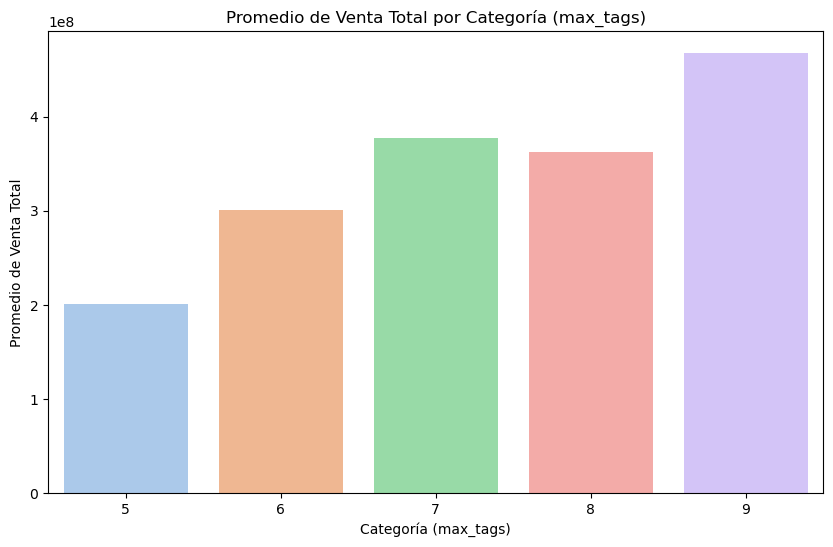

In [28]:
# Gráfico de barras con promedios

# Importación de librería numerica 
import numpy as np

# Gráfica de barras para ventas promedio por tags máximos 
plt.figure(figsize=(10, 6))
sns.barplot(x='max_tags', y='venta_total', data=df_merged, estimator=np.mean,ci=None)
plt.title('Promedio de Venta Total por Categoría (max_tags)')
plt.xlabel('Categoría (max_tags)')
plt.ylabel('Promedio de Venta Total')
plt.show()

<p style="font-size: 16px;">En relación con las ventas totales vamos a encontrar como el mayor número de tags se relaciona con más ventas totales, esto porque los tags se relacionan a servicios ofertados por el seller en relación al cliente

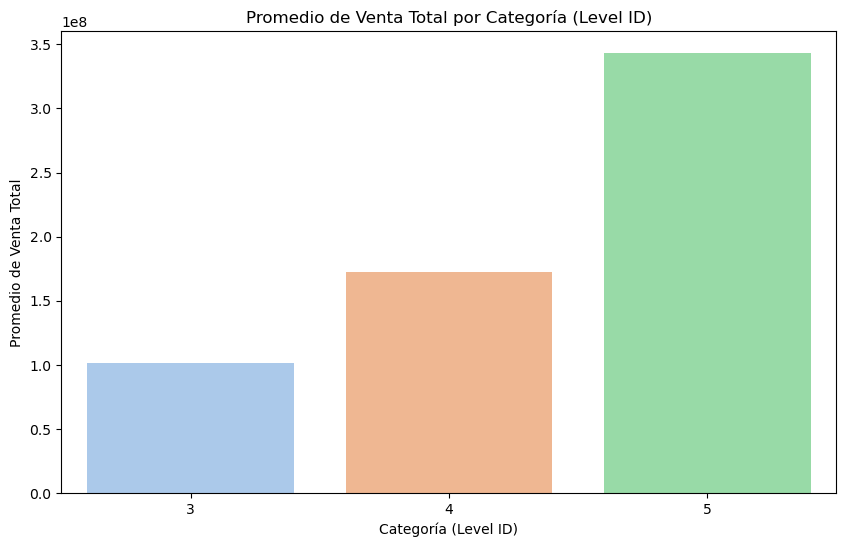

In [29]:
# Gráfica de barras para ventas promedio por Level ID
plt.figure(figsize=(10, 6))
sns.barplot(x='Level ID', y='venta_total', data=df_merged, estimator=np.mean,ci=None)
plt.title('Promedio de Venta Total por Categoría (Level ID)')
plt.xlabel('Categoría (Level ID)')
plt.ylabel('Promedio de Venta Total')
plt.show()


<p style="font-size: 16px;">En cuanto al level id podemos concluir que tiene una relación directa con el volumen en dinero de las ventas facturadas por los seller, sin embargo como vimos en grpaficas anteriores no es posible segmentar para más variables

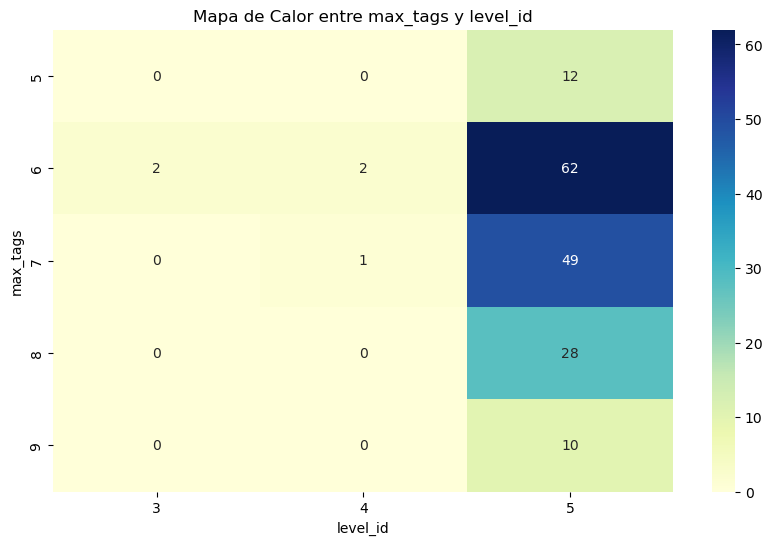

In [30]:
# Creación de tablas de frecuencia
tabla_frecuencia = pd.crosstab(df_merged['max_tags'], df_merged['Level ID'])

# Creación de mapa de calor max tags y level ID
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_frecuencia, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre max_tags y level_id')
plt.xlabel('level_id')
plt.ylabel('max_tags')
plt.show()

<p style="font-size: 16px;"> Acá vemos un poco esa conclusión ya que si bien la mayoría de los sellers se encuentran en nivel 5 vamos a ver como varían para otras variables y esta categorización no logra leer diferencias 

---
## Construcción de solución analítica
---

## PCA

In [31]:
# Codificacion de variables categoricas nominales

# Importación de función de codificación
from sklearn.preprocessing import OneHotEncoder

# Supongamos que tienes un DataFrame llamado df_sin_variables con columnas categóricas
categoricas = df_sin_variables.select_dtypes(include='object')

# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Ajustar y transformar las variables categóricas usando OneHotEncoder
categoricas_encoded = encoder.fit_transform(categoricas)

# Crear un nuevo DataFrame con las variables codificadas y mantener el índice original
df_sin_variables_encoded = pd.concat([df_sin_variables.drop(categoricas.columns, axis=1), pd.DataFrame(categoricas_encoded.toarray(), columns=encoder.get_feature_names_out(categoricas.columns), index=df_sin_variables.index)], axis=1)

# Mostrar el DataFrame resultante
df_sin_variables_encoded

,cash_inventario,venta_total,max_tags,Level ID,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results,Power Seller Status_None status,Power Seller Status_gold,Power Seller Status_platinum,Power Seller Status_silver
seller_id,,,,,,,,,,,,,,,,,,
23463946,7791785,310523483,8,5,0.89,0.01,4111,690,0.0083,6,0.0000,0,100,83,0.0,1.0,0.0,0.0
606851103,74156004,315391766,6,5,0.86,0.04,2628,434,0.0150,7,0.0086,4,84,50,0.0,1.0,0.0,0.0
470474833,2536921050,1352471538,6,5,0.74,0.04,8078,1235,0.0142,19,0.0187,25,635,635,1.0,0.0,0.0,0.0
460122197,55612152,64625327,6,5,0.69,0.04,2541,668,0.0084,6,0.0084,6,34,34,0.0,0.0,1.0,0.0
353486933,97906791,144846030,6,3,0.86,0.04,1397,88,0.0520,5,0.0104,1,215,37,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153636791,38155000,58715700,5,5,1.00,0.00,476,108,0.0088,1,0.0000,0,311,311,1.0,0.0,0.0,0.0
1207093176,1841681815,4398305935,6,5,0.61,0.03,23060,2388,0.0067,17,0.0003,1,287,287,0.0,0.0,1.0,0.0
168574945,15326027,105138502,5,5,0.90,0.05,2192,194,0.0050,1,0.0050,1,1101,33,0.0,0.0,0.0,1.0


In [32]:
# Estandarizacion de variables númericas del dataset

# Importación de función de estandarización
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas que son numéricas (asumiendo que las categóricas ya están codificadas)
numericas = df_sin_variables_encoded.select_dtypes(include=['float64', 'int64'])

# Estandarizar las variables numéricas (importante para PCA)
scaler = StandardScaler()
numericas_estandarizadas = pd.DataFrame(scaler.fit_transform(numericas), columns=numericas.columns, index=df_sin_variables_encoded.index)

# Combinar las variables numéricas estandarizadas y las variables categóricas codificadas
df_para_pca = pd.concat([numericas_estandarizadas, df_sin_variables_encoded.drop(numericas.columns, axis=1)], axis=1)

# Mostrar el DataFrame resultante
df_para_pca

,cash_inventario,venta_total,max_tags,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results,Power Seller Status_None status,Power Seller Status_gold,Power Seller Status_platinum,Power Seller Status_silver,Level ID
seller_id,,,,,,,,,,,,,,,,,,
23463946,-0.363846,-0.048241,1.233211,0.101956,-1.008614,-0.362019,-0.379470,-0.092679,-0.352441,-0.719076,-0.378996,-0.373918,-0.383226,-0.440732,2.046338,-0.907841,-0.488678,5
606851103,-0.255224,-0.039385,-0.735184,-0.229900,0.570914,-0.468229,-0.487693,0.768456,-0.309485,1.297727,-0.104864,-0.393525,-0.503475,-0.440732,2.046338,-0.907841,-0.488678,5
470474833,3.775723,1.847213,-0.735184,-1.557324,0.570914,-0.077909,-0.149074,0.665634,0.205979,3.666297,1.334331,0.281699,1.628217,2.268953,-0.488678,-0.907841,-0.488678,5
460122197,-0.285576,-0.495566,-0.735184,-2.110418,0.570914,-0.474460,-0.388771,-0.079827,-0.352441,1.250824,0.032202,-0.454798,-0.561778,-0.440732,-0.488678,1.101514,-0.488678,5
353486933,-0.216350,-0.349633,-0.735184,-0.229900,0.570914,-0.556391,-0.633963,5.523979,-0.395396,1.719848,-0.310463,-0.232991,-0.550846,2.268953,-0.488678,-0.907841,-0.488678,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153636791,-0.314149,-0.506316,-1.719381,1.318761,-1.535124,-0.622352,-0.625508,-0.028415,-0.567218,-0.719076,-0.378996,-0.115348,0.447587,2.268953,-0.488678,-0.907841,-0.488678,5
1207093176,2.637785,7.388026,-0.735184,-2.995367,0.044404,0.995076,0.338352,-0.298324,0.120068,-0.648722,-0.310463,-0.144758,0.360133,-0.440732,-0.488678,1.101514,-0.488678,5
168574945,-0.351514,-0.421866,-1.719381,0.212574,1.097423,-0.499455,-0.589152,-0.516821,-0.567218,0.453484,-0.310463,0.852759,-0.565422,-0.440732,-0.488678,-0.907841,2.046338,5


In [33]:
# PCA

# Importación de función para PCA
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA()
pca_resultados = pca.fit_transform(df_para_pca)

# Imprimir la proporción de la varianza explicada por cada componente principal
print("Proporción de varianza explicada:")
print(pca.explained_variance_ratio_)

Proporción de varianza explicada:
[2.60459905e-01 1.33051541e-01 8.70514888e-02 7.90673298e-02
 7.28104582e-02 6.94454964e-02 6.15864684e-02 5.46891218e-02
 4.40993833e-02 3.59868824e-02 3.29612357e-02 2.44701838e-02
 1.82731800e-02 1.57931751e-02 5.38128809e-03 2.82941239e-03
 2.04345005e-03 3.99790384e-33]


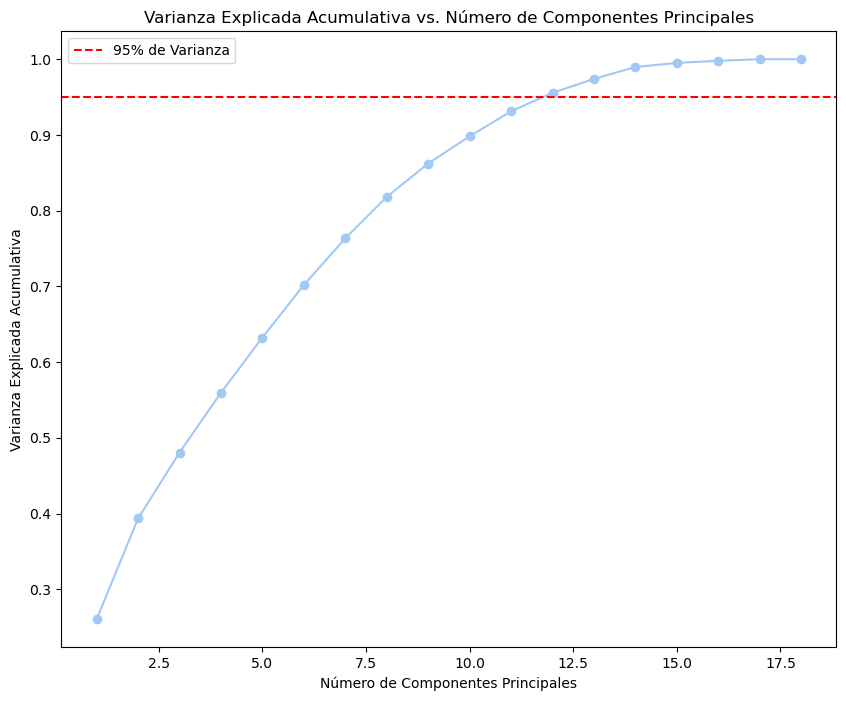

Varianza Explicada Acumulativa:
[0.2604599  0.39351145 0.48056293 0.55963026 0.63244072 0.70188622
 0.76347269 0.81816181 0.86226119 0.89824807 0.93120931 0.95567949
 0.97395267 0.98974585 0.99512714 0.99795655 1.         1.        ]


In [34]:
# Obtener la varianza explicada acumulativa
varianza_explicada_acumulativa = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza explicada acumulativa
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(varianza_explicada_acumulativa) + 1), varianza_explicada_acumulativa, marker='o')

plt.axhline(y=0.95, color='r', linestyle='--', label='95% de Varianza')

plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa vs. Número de Componentes Principales')
plt.legend()
plt.show()

# Imprimir la varianza explicada acumulativa
print("Varianza Explicada Acumulativa:")
print(varianza_explicada_acumulativa)

<p style="font-size: 16px;">De acuerdo a los resultados de la gráfica el número de componentes seleccionados seran 10 ya que este es el punto donde la varianza explicada alcanza el 95%

In [35]:
# Definición de pca de acuerdo a gráfica (varianza explicativa del 95%)
n_componentes_principales = 10
df_pca_seleccionado = pca_resultados[:, :n_componentes_principales]

---
## Clusterización para evaluar mejores sellers

--- 
## Pruebas de clusters optimos

C:\Users\ivanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


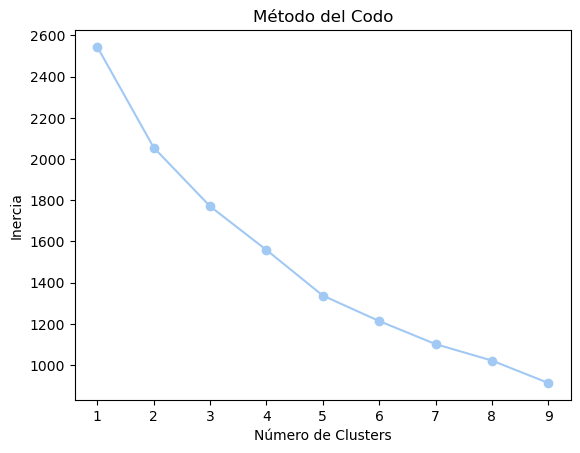

In [36]:
# Metodo del codo

from sklearn.cluster import KMeans


# Supongamos que tienes tus datos en X
X = df_pca_seleccionado
# Lista para almacenar los valores de la inercia (criterio del codo)
inertia = []

# Probar diferentes valores de k (número de clusters)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar la inercia en función de k
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

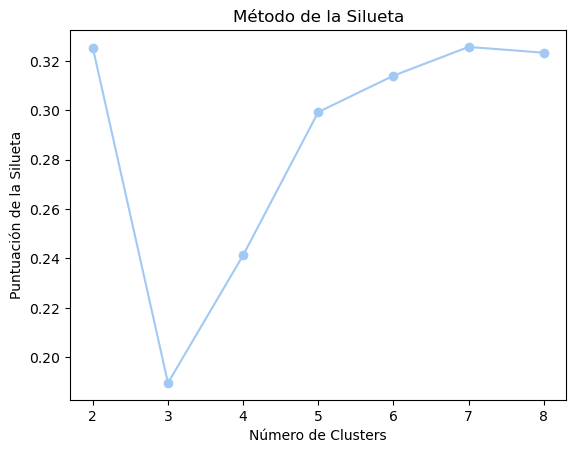

In [37]:
# Metodo de silueta

from sklearn.metrics import silhouette_score


# Lista para almacenar los valores de la silueta
silhouette_scores = []

# Probar diferentes valores de k (número de clusters)
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar la puntuación de la silueta en función de k
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de la Silueta')
plt.show()

<p style="font-size: 16px;"> Para las pruebas de los cluster optimos podemos observar como el metodo del codo no es suficiente para evaluar el número de clusters ya que este no presenta una variación suficientemente clara en la pendiente, mientras que con el metodo de silueta podemos observar como el valor máximo se optiene con 2 clusters por lo cual este sera el número de clusters optimo a utilizar

---
## Cluster final

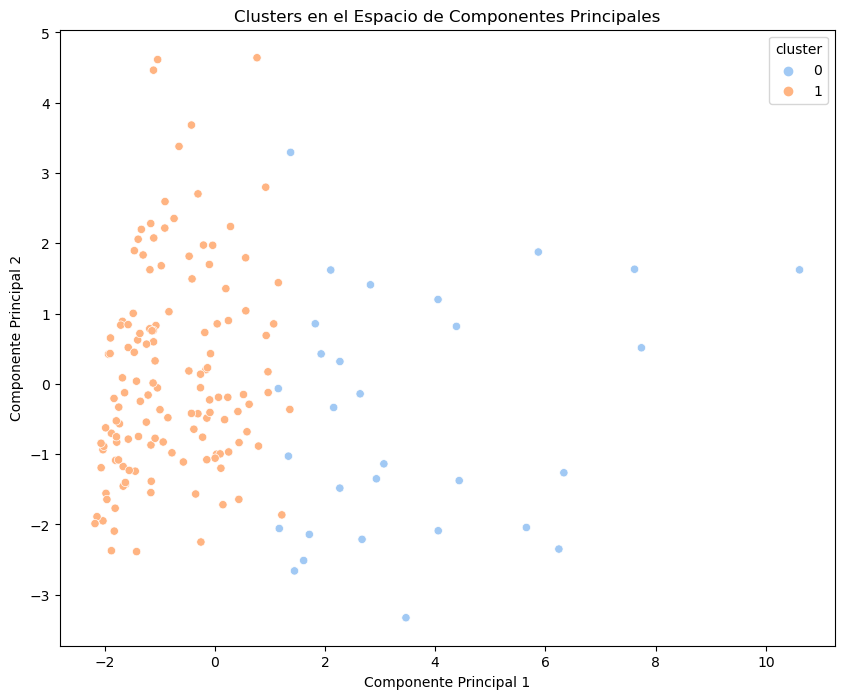

0    0.180723
1    0.819277
Name: cluster, dtype: float64


In [38]:
# Aplicar K-Means

num_clusters = 2  # Ajustados de acuerdo a metodo de silueta
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_sin_variables['cluster'] = kmeans.fit_predict(df_pca_seleccionado)

# Visualizar la distribución de los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca_seleccionado[:, 0], y=df_pca_seleccionado[:, 1], hue=df_sin_variables['cluster'])
plt.title('Clusters en el Espacio de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Ver la distribución de variables en cada cluster
cluster_distribucion = df_sin_variables['cluster'].value_counts(normalize=True).sort_index()
print(cluster_distribucion)

<p style="font-size: 16px;">Los clusters quedan con una proporción 85 15 lo que podríamos definir como un pareto donde en el cluster pequeño tenemos los sellers más relevantes para el negocio y por consiguiente los que deben ser priorizados

---

## Análisis exploratorio de cluster seleccionado

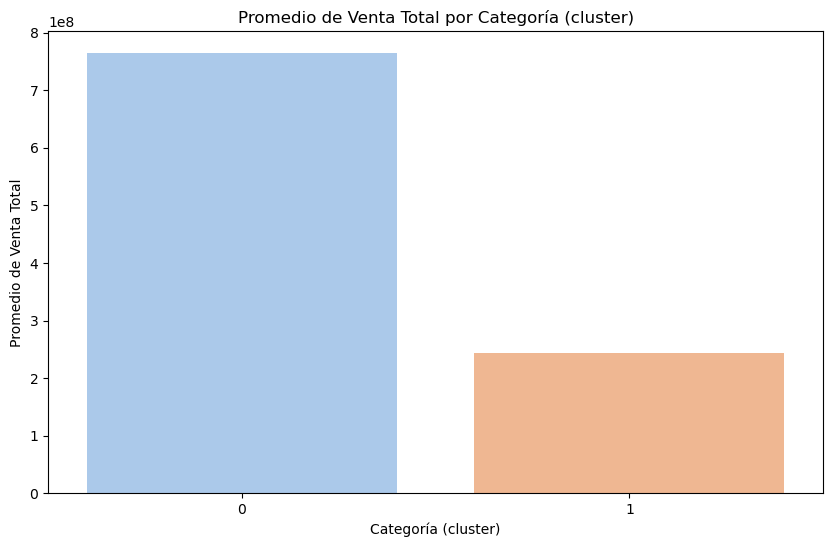

In [39]:
# Venta total

# Gráfico de barras para promedio de venta total por cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='venta_total', data=df_sin_variables, estimator=np.mean,ci=None)
plt.title('Promedio de Venta Total por Categoría (cluster)')
plt.xlabel('Categoría (cluster)')
plt.ylabel('Promedio de Venta Total')
plt.show()

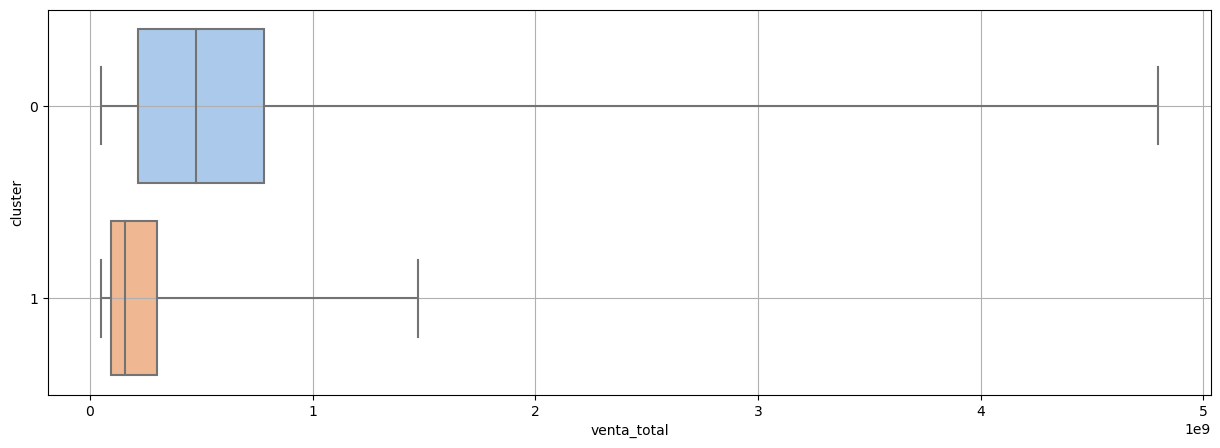

In [40]:
# Distribución acotada sin extremos de las colas

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (15,5))
sns.boxplot(data = df_sin_variables, x = df_sin_variables['venta_total'], y = 'cluster', ax = ax, orient = 'h', whis =[0,100])
plt.grid();

<p style="font-size: 16px;">Super posición parcial de distribciones , más diferenciada que level id 5 donde el cluster menor reune los mayores vendedores

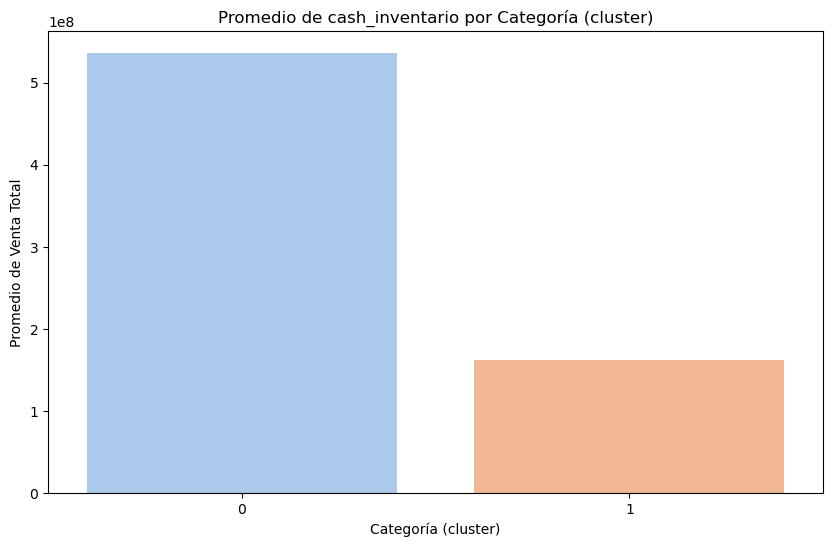

In [41]:
# Inventario

# Gráfico de barras para promedio de venta total por cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='cash_inventario', data=df_sin_variables, estimator=np.mean,ci=None)
plt.title('Promedio de cash_inventario por Categoría (cluster)')
plt.xlabel('Categoría (cluster)')
plt.ylabel('Promedio de Venta Total')
plt.show()

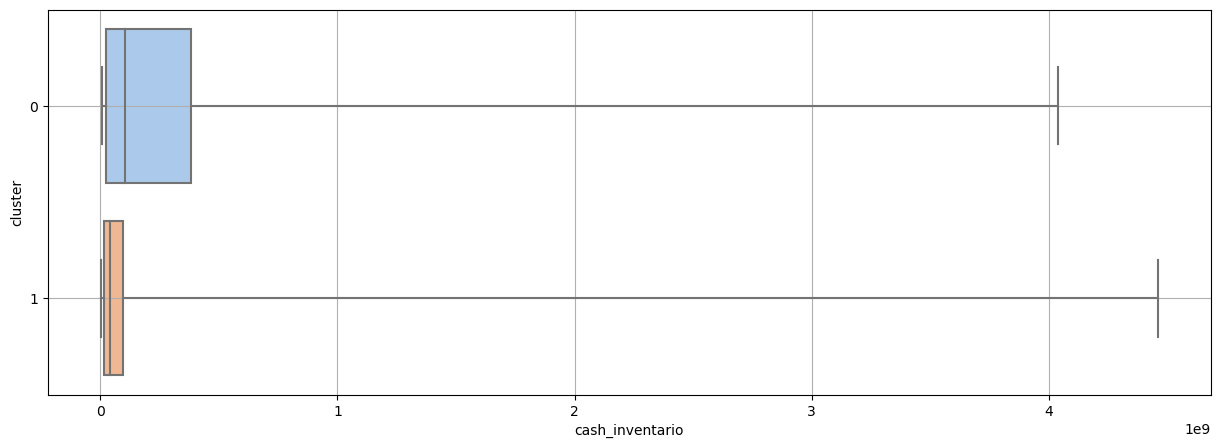

In [42]:
# Distribución acotada sin extremos de las colas

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (15,5))
sns.boxplot(data = df_sin_variables, x = df_sin_variables['cash_inventario'], y = 'cluster', ax = ax, orient = 'h', whis =[0,100])
plt.grid();

<p style="font-size: 16px;"> En terminos de inventario no encontramos una diferencia significativa

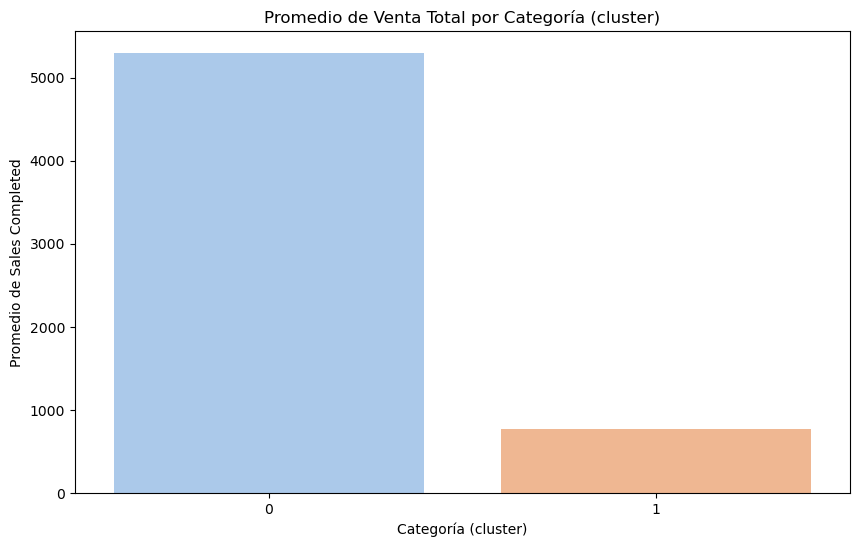

In [43]:
# Sales complete

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='Sales Completed', data=df_sin_variables, estimator=np.mean,ci=None)
plt.title('Promedio de Venta Total por Categoría (cluster)')
plt.xlabel('Categoría (cluster)')
plt.ylabel('Promedio de Sales Completed')
plt.show()

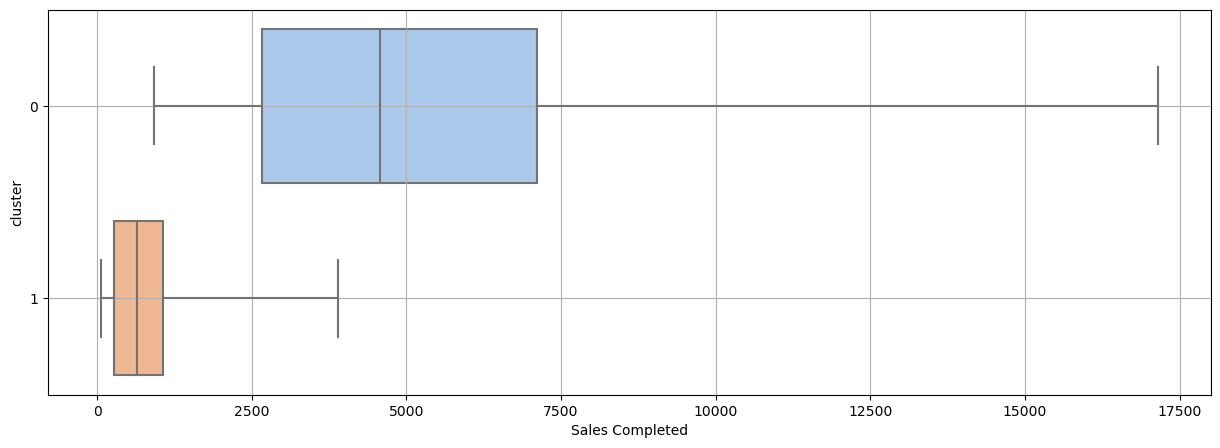

In [44]:
# Distribución acotada sin extremos de las colas

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (15,5))
sns.boxplot(data = df_sin_variables, x = df_sin_variables['Sales Completed']
            , y = 'cluster', ax = ax, orient = 'h', whis =[0,100])
plt.grid();

<p style="font-size: 16px;"> En terminos de ventas completadas si encontramos una diferencia signifcativa

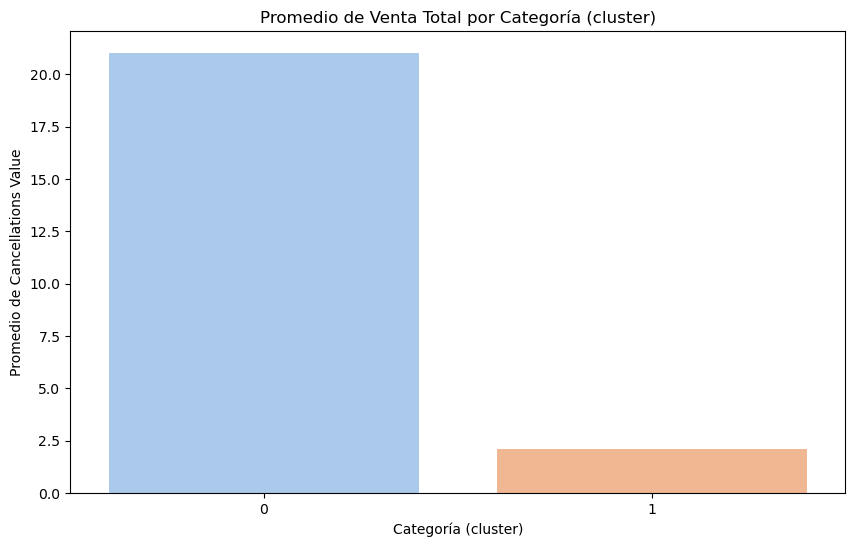

In [45]:
# Cancellation Value

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='Cancellations Value', data=df_sin_variables, estimator=np.mean,ci=None)
plt.title('Promedio de Venta Total por Categoría (cluster)')
plt.xlabel('Categoría (cluster)')
plt.ylabel('Promedio de Cancellations Value')
plt.show()

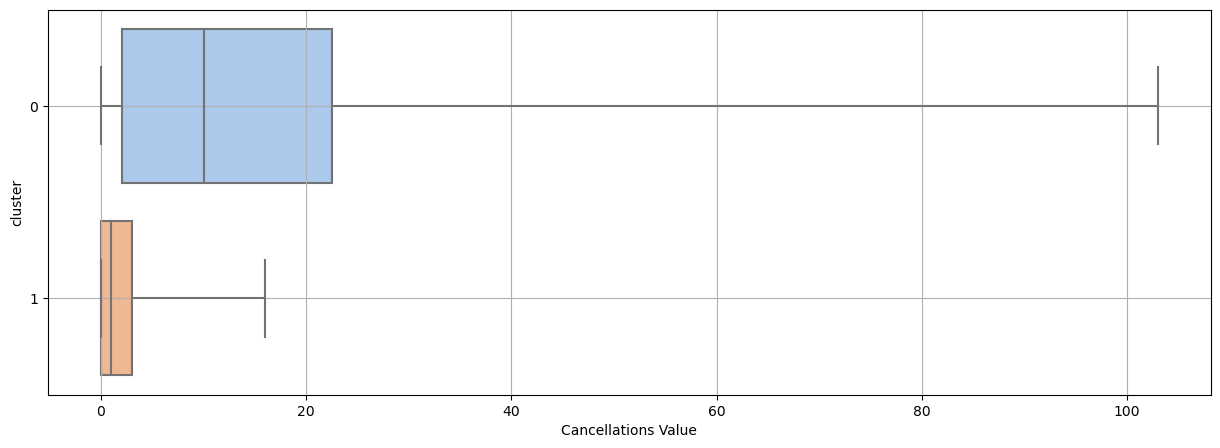

In [46]:
# Distribución acotada sin extremos de las colas

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (15,5))
sns.boxplot(data = df_sin_variables, x = df_sin_variables['Cancellations Value']
            , y = 'cluster', ax = ax, orient = 'h', whis =[0,100])
plt.grid();

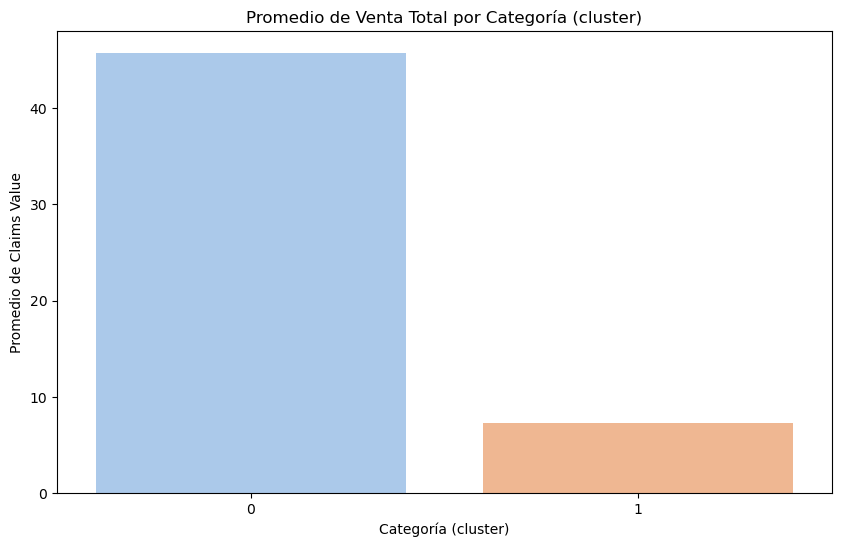

In [47]:
# Claims value

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='Claims Value', data=df_sin_variables, estimator=np.mean,ci=None)
plt.title('Promedio de Venta Total por Categoría (cluster)')
plt.xlabel('Categoría (cluster)')
plt.ylabel('Promedio de Claims Value')
plt.show()

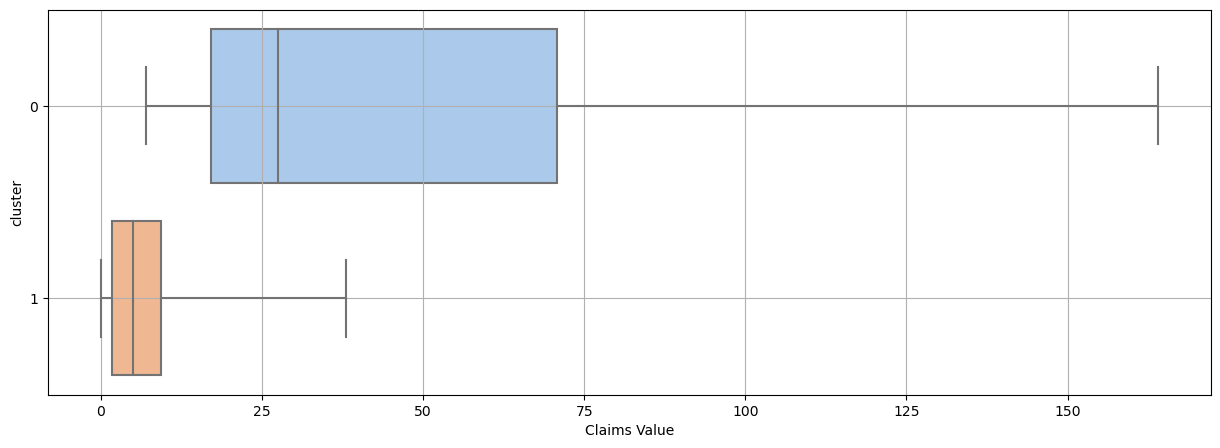

In [48]:
# Distribución acotada sin extremos de las colas

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (15,5))
sns.boxplot(data = df_sin_variables, x = df_sin_variables['Claims Value']
            , y = 'cluster', ax = ax, orient = 'h', whis =[0,100])
plt.grid();

<p style="font-size: 16px;">Tambien encontramos que este grupo tiene más cancelaciones y reclamos

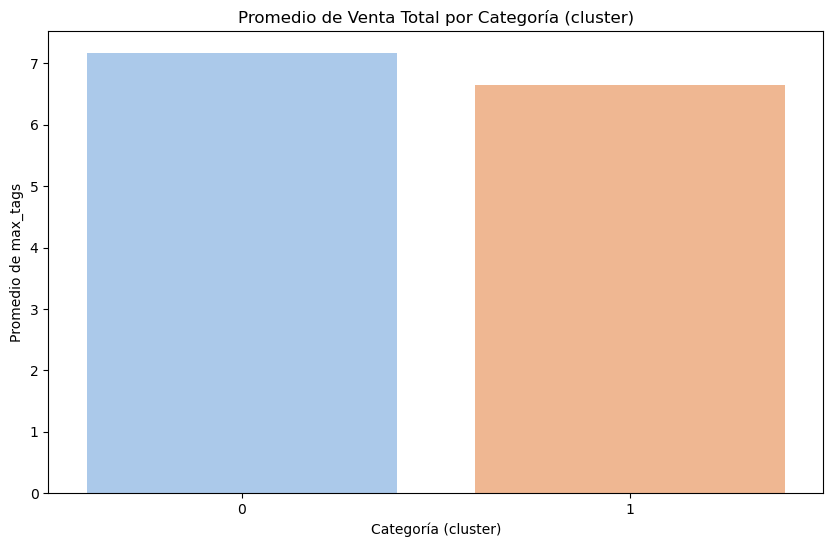

In [50]:
# Primary results

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='max_tags', data=df_sin_variables, estimator=np.mean,ci=None)
plt.title('Promedio de Venta Total por Categoría (cluster)')
plt.xlabel('Categoría (cluster)')
plt.ylabel('Promedio de max_tags')
plt.show()

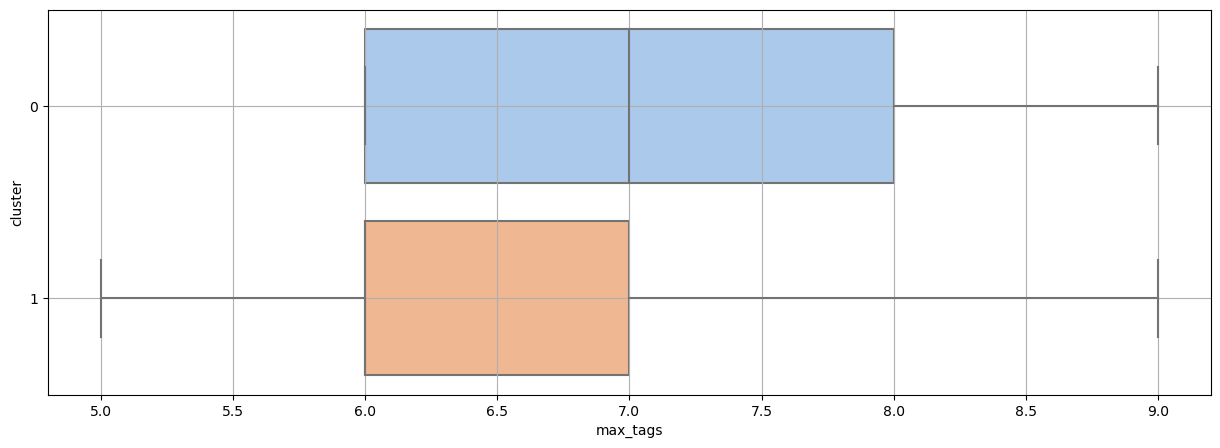

In [51]:
# Distribución acotada sin extremos de las colas

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (15,5))
sns.boxplot(data = df_sin_variables, x = df_sin_variables['max_tags']
            , y = 'cluster', ax = ax, orient = 'h', whis =[0,100])
plt.grid();

<p style="font-size: 16px;">En cuanto a los tags podemos ver que agrupan una distribución de más servicios

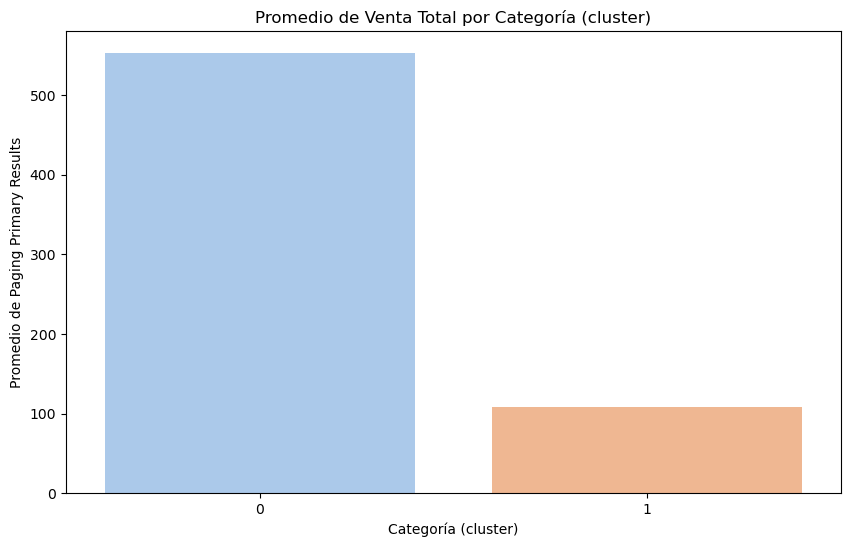

In [52]:
# Tags

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='Paging Primary Results', data=df_sin_variables, estimator=np.mean,ci=None)
plt.title('Promedio de Venta Total por Categoría (cluster)')
plt.xlabel('Categoría (cluster)')
plt.ylabel('Promedio de Paging Primary Results')
plt.show()

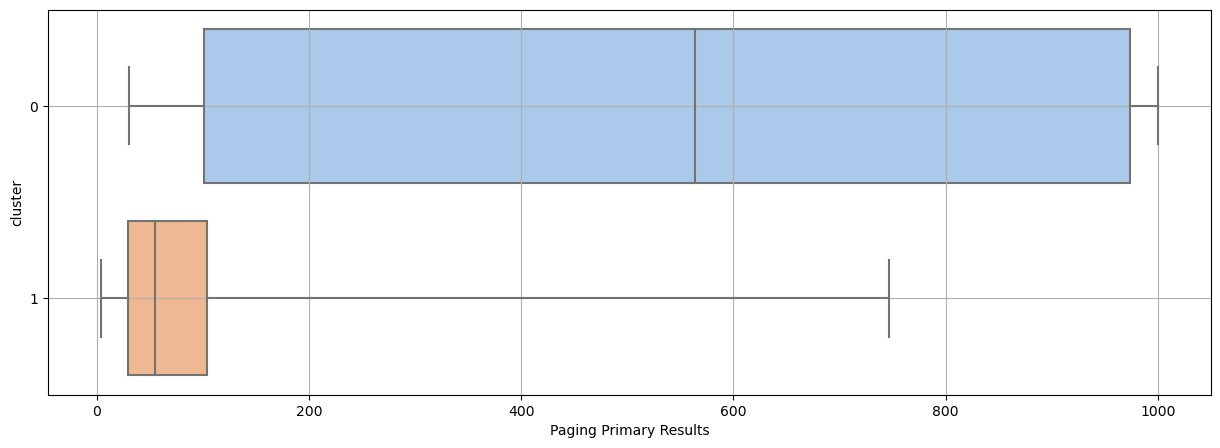

In [53]:
# Distribución acotada sin extremos de las colas

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (15,5))
sns.boxplot(data = df_sin_variables, x = df_sin_variables['Paging Primary Results']
            , y = 'cluster', ax = ax, orient = 'h', whis =[0,100])
plt.grid();

<p style="font-size: 16px;">Y en cuanto a resultados principales son los que manejan mejores resultados

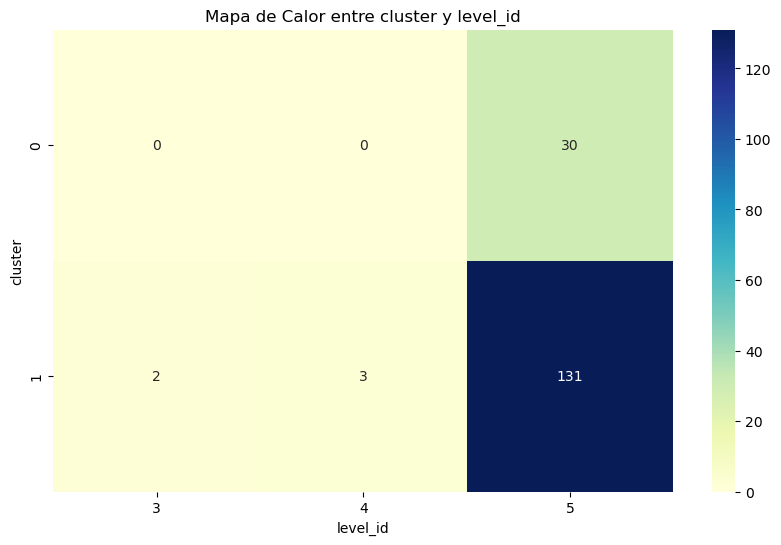

In [54]:
# Crear una tabla de frecuencia (crosstab)
tabla_frecuencia = pd.crosstab(df_sin_variables['cluster'], df_sin_variables['Level ID'])

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_frecuencia, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre cluster y level_id')
plt.xlabel('level_id')
plt.ylabel('cluster')
plt.show()

<p style="font-size: 16px;">Por ultimo podemos ver como los clusters si dintinguen un grupo potencialmente mejor de clientes al separar parte del level id 5

--- 
## Entrega de información para comerciales
---

In [55]:
# Calcular las medias de la variable 'variable_a_evaluar' para cada cluster
medias_por_cluster = df_sin_variables.groupby('cluster')['venta_total'].mean()

# Obtener el nombre del mejor y peor cluster
nombre_mejor_cluster = medias_por_cluster.idxmax()
nombre_peor_cluster = medias_por_cluster.idxmin()

# Crear una nueva columna 'tipo_cluster' basada en las medias
df_sin_variables['grupo_comercial'] = df_sin_variables['cluster'].map({nombre_mejor_cluster: 'MEJOR_POTENCIAL', nombre_peor_cluster: 'SEGUNDOS_POTENCIALES'})

# Mostrar el DataFrame resultante
df_sin_variables

,cash_inventario,venta_total,max_tags,Level ID,Power Seller Status,Positive Ratings,Neutral Ratings,Total Transactions,Sales Completed,Claims Rate,Claims Value,Cancellations Rate,Cancellations Value,Paging Total,Paging Primary Results,cluster,grupo_comercial
seller_id,,,,,,,,,,,,,,,,,
23463946,7791785,310523483,8,5,gold,0.89,0.01,4111,690,0.0083,6,0.0000,0,100,83,1,SEGUNDOS_POTENCIALES
606851103,74156004,315391766,6,5,gold,0.86,0.04,2628,434,0.0150,7,0.0086,4,84,50,1,SEGUNDOS_POTENCIALES
470474833,2536921050,1352471538,6,5,None status,0.74,0.04,8078,1235,0.0142,19,0.0187,25,635,635,0,MEJOR_POTENCIAL
460122197,55612152,64625327,6,5,platinum,0.69,0.04,2541,668,0.0084,6,0.0084,6,34,34,1,SEGUNDOS_POTENCIALES
353486933,97906791,144846030,6,3,None status,0.86,0.04,1397,88,0.0520,5,0.0104,1,215,37,1,SEGUNDOS_POTENCIALES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153636791,38155000,58715700,5,5,None status,1.00,0.00,476,108,0.0088,1,0.0000,0,311,311,1,SEGUNDOS_POTENCIALES
1207093176,1841681815,4398305935,6,5,platinum,0.61,0.03,23060,2388,0.0067,17,0.0003,1,287,287,0,MEJOR_POTENCIAL
168574945,15326027,105138502,5,5,silver,0.90,0.05,2192,194,0.0050,1,0.0050,1,1101,33,1,SEGUNDOS_POTENCIALES


In [56]:
# Data a entregar

df2.set_index('seller_id', inplace=True)


df_final = df2.join(df_sin_variables[['grupo_comercial']], how = 'inner')
# Union de dataframes a usar en modelamiento
df_final

,Nickname,grupo_comercial
seller_id,,
23463946,GARAJEC,SEGUNDOS_POTENCIALES
606851103,WILTECHNO SASA,SEGUNDOS_POTENCIALES
470474833,RESELLER_AUTORIZADO,MEJOR_POTENCIAL
460122197,TUTIENDAVIRTUAL D.C,SEGUNDOS_POTENCIALES
353486933,ELCOMPRADORNY.COM,SEGUNDOS_POTENCIALES
...,...,...
153636791,TIENDA ELECTROTEGNO,SEGUNDOS_POTENCIALES
1207093176,SAMSUNG COLOMBIA,MEJOR_POTENCIAL
168574945,COMERCIALIZADORA OSS,SEGUNDOS_POTENCIALES


<p style="font-size: 16px;">Queda como entrega para los comerciales un archivo con los sellers ya clasificados y recomendaciones frente al grupo de mejor potencial dadas las caracteristicas del cluster